<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 -  Unveiling the Recipe for Comedy Success - Analyzing Viewer Preferences and Sentiment towards Popular Sitcoms

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Feature Engineering](#Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Sentiment Analysis](#EDA-4---Sentiment-Analysis)
- [Modeling](#Modeling)
    - [Fine Tuning of Best Models](#Fine-Tuning-of-Best-Models)
    - [Best Model Evaluation](#Best-Model-Evaluation)
- [Key Insights & Recommendations](#Conclusion)

# Background

The streaming services market has witnessed significant growth in recent years, revolutionizing the way people consume entertainment content. With the advent of high-speed internet and advancements in technology, streaming platforms have become increasingly popular, offering a wide range of TV shows, movies, and original content to millions of subscribers worldwide.

Leading the industry is Netflix, with an impressive subscriber base of 223.09 million, followed closely by Prime Video with over 200 million subscribers. These platforms provide extensive libraries of content, personalized recommendations, and user-friendly interfaces to enhance the streaming experience.

Disney+ quickly gained traction after its 2019 launch, amassing 164.2 million subscribers by leveraging Disney's iconic franchises and family-friendly content. HBO Max, backed by WarnerMedia, offers a premium streaming experience with its diverse catalog of original series, blockbuster movies, and exclusive streaming rights.

The competition among these major players reflects the growing demand for on-demand content and the convenience of streaming platforms. As the market evolves, it presents immense opportunities for content creators, production studios, and consumers alike, shaping the future of entertainment consumption.

## Scraped Datasets

* [`bigbangtheory_hot_full.csv`](../data/bigbangtheory_hot_full.csv): this data contains all of the posts scraped from the subreddit 'r/bigbangtheory' with the 'hot' tag
* [`brooklynninenine_hot_full.csv`](../data/brooklynninenine_hot_full.csv): this data contains all of the posts scraped from the subreddit 'r/brooklynninenine' with the 'hot' tag

## Problem Statement

**Netflix is seeking to understand the specific elements that have contributed to the popularity of two sitcoms, "Big Bang Theory" and "Brooklyn Nine Nine," among viewers. In order to gain insights into viewer preferences and make data-driven decisions, the company requires a robust machine learning solution capable of classifying and analyzing user comments from various platforms pertaining to these shows. The objective is to develop an infrastructure that can accurately identify which show the viewers' comments are referring to and conduct sentiment analysis to determine the sentiments expressed towards each show. By successfully achieving this, Netflix will be able to uncover the key factors that have made these sitcoms popular, enabling them to enhance their content strategy and prioritize the elements that resonate most with viewers.**

* Identify specific elements in sitcoms that are popular among the viewers

* To build an infrastructure that can help to classify and analyse user's comments about the show from various platforms

## Project Goals

1. **Data Wrangling/Gathering/Acquisition**: Gather data from some unstructured/semi-structured sources, with or without an API
2. **Natural Language Processing**: Converting standard text data (like Titles and Comments) into a format that allows us to analyze it and use it in modeling, using vectorizers, such as CountVectorizer, TfidfVectorizer and Word2vec word embedding technique
3. **Classification Modeling**: Using different models, means of assessment and preprocessing associated with classification, including Logistic Regression, Naive Bayes classifier, and Random Forest Classifier

## Outside Research

Outside research were made to obtain some necessary domain knowledge

1. Preferred digital video content by genre in the U.S. as of March 2023
    Comedy genre is cited ad the top preferred digital content genre in the US as of March 2023
    
    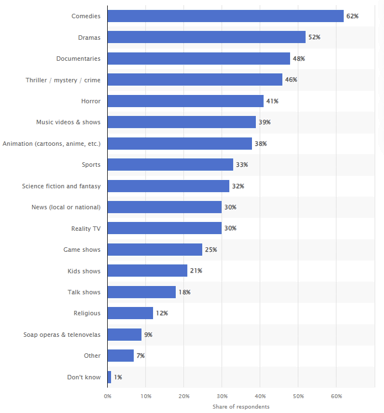
    
    Source: https://www.statista.com/forecasts/997166/preferred-digital-video-content-by-genre-in-the-us#:~:text=%22Comedies%22%20and%20%22Dramas%22,the%20United%20States%2C%20in%202023.

2. Importance of video streaming attributes

    "Variety / Availability of content" is cited as one of the top 3 important attributes considered by consumer when deciding on their streaming service provider. Thus, indicating that the availability of certain content plays a huge factor in consumer's decision on choosing their streaming service provider.

    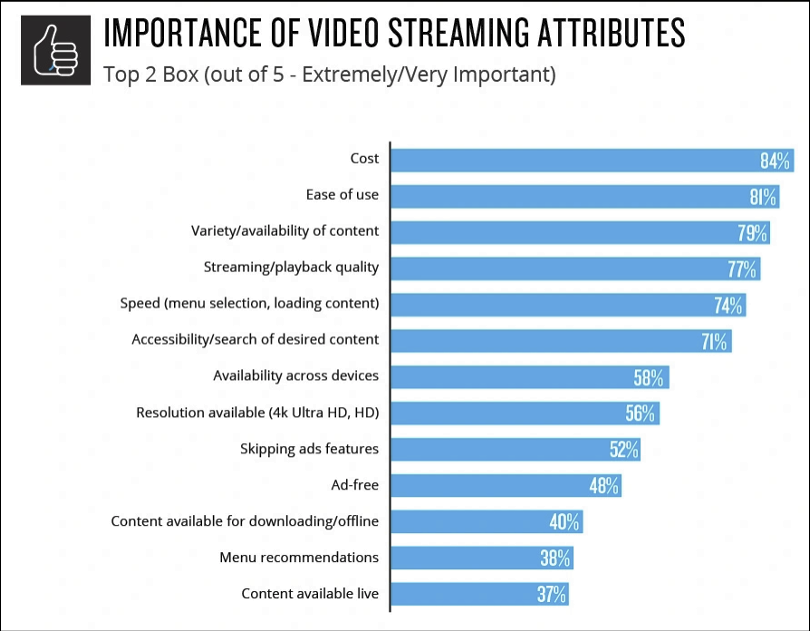

     Source: https://www.nielsen.com/insights/2020/playback-time-which-consumer-attitudes-will-shape-the-streaming-wars/![Picture%201.png](attachment:Picture%201.png)

3. Reasons for subcribing to additional paid video streaming services

    "Wanting to watch programs I've heard about" & " To access original content exclusive to streaming platforms" are cited as the top 3 and 4 reasons by consumers for subscribing to additional paid video streaming services. Thus further reinforcing the importance of content library of a streaming service to not only attract customers that have yet to subscribe to any streaming services but also to attract those customers that already have a subscription with another streaming service to subscribe to another secondary streaming service.

    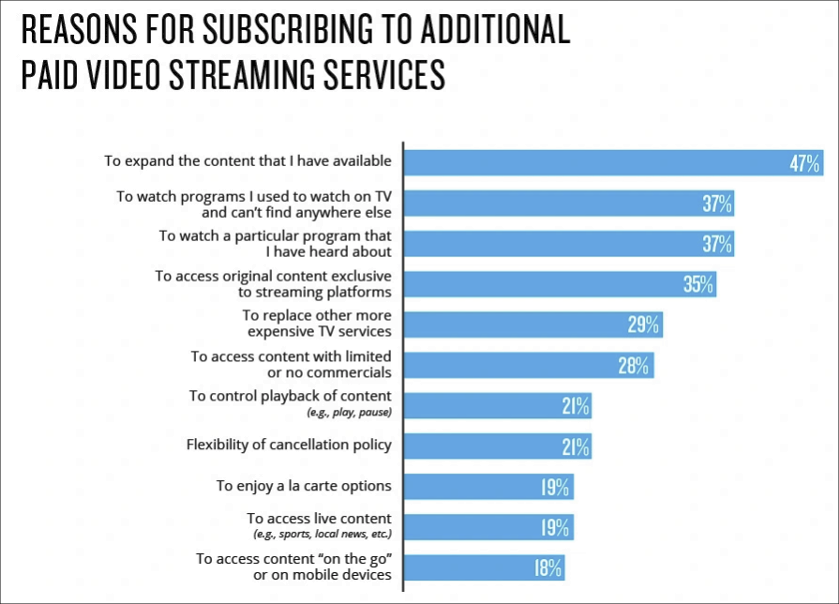

     Source: https://www.nielsen.com/insights/2020/playback-time-which-consumer-attitudes-will-shape-the-streaming-wars/

4. Most attractive features of video streaming service
 
     "Has desired shows" is cited as the top reason by consumer as to what they would find most attractive as a feature for video streaming service. Clearly shows that what content is available in a streaming service's library is excruciatingly important to retain current customers.
     
![image.png](attachment:image.png)

     Source: https://www.cloudwards.net/streaming-services-statistics/

5. Top reasons to subscribe to a new streaming service
 
     "Broad content", "Content of interest" & "New original content" are cited as the top reason by consumer as to why they would subscribe to a new video streaming service. Further cementing that availability of quality content in a streaming service's library is important to retain current customers and new customers.
     
     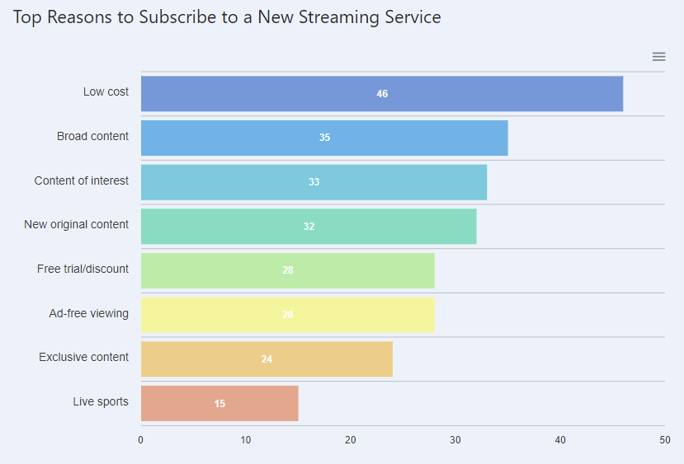
     
     Source: https://www.cloudwards.net/streaming-services-statistics/

6. Streaming Industry Digital Market Share 

    Market share of Netflix has clearly dropped from March 2020 to March 2023 due to the influx of competitors that not only compete with Netflix but also took certain current contents away from Netflix's library that most likely drove current consumers to the competitors.

    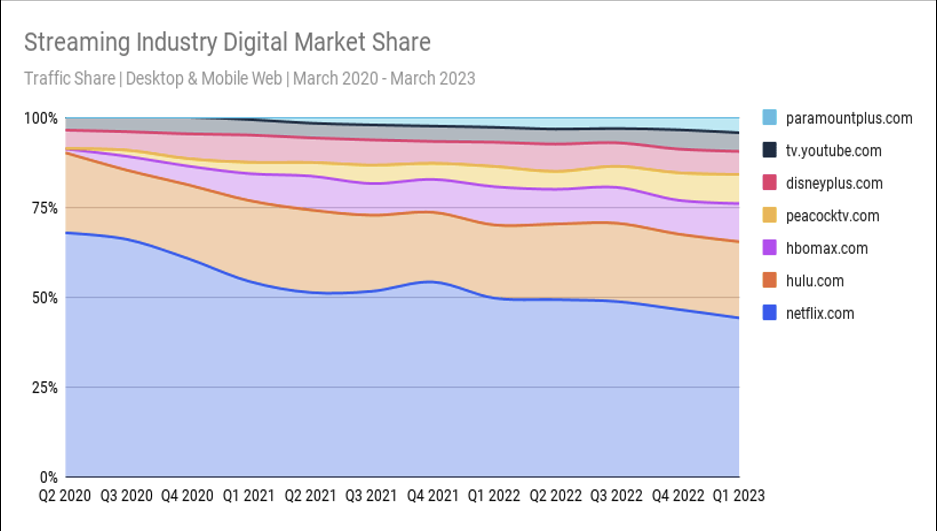

     Source: https://www.similarweb.com/blog/insights/media-entertainment-news/streaming-q1-2023/#:~:text=The%20streaming%20industry%20has%20shown,in%20a%20post%2Dpandemic%20world.

7. Singaporeans asked if they would discontinue their current streaming services in the next 6 months.

    61% of Singaporeans responded that they would likely to discontinue their current streaming services within the next 6 months, indicating that churning of streaming services is quite substantial and content of a streaming service's library would play a huge role in not only retaining current customers but also attracting customers that are subsribed to competitors.

    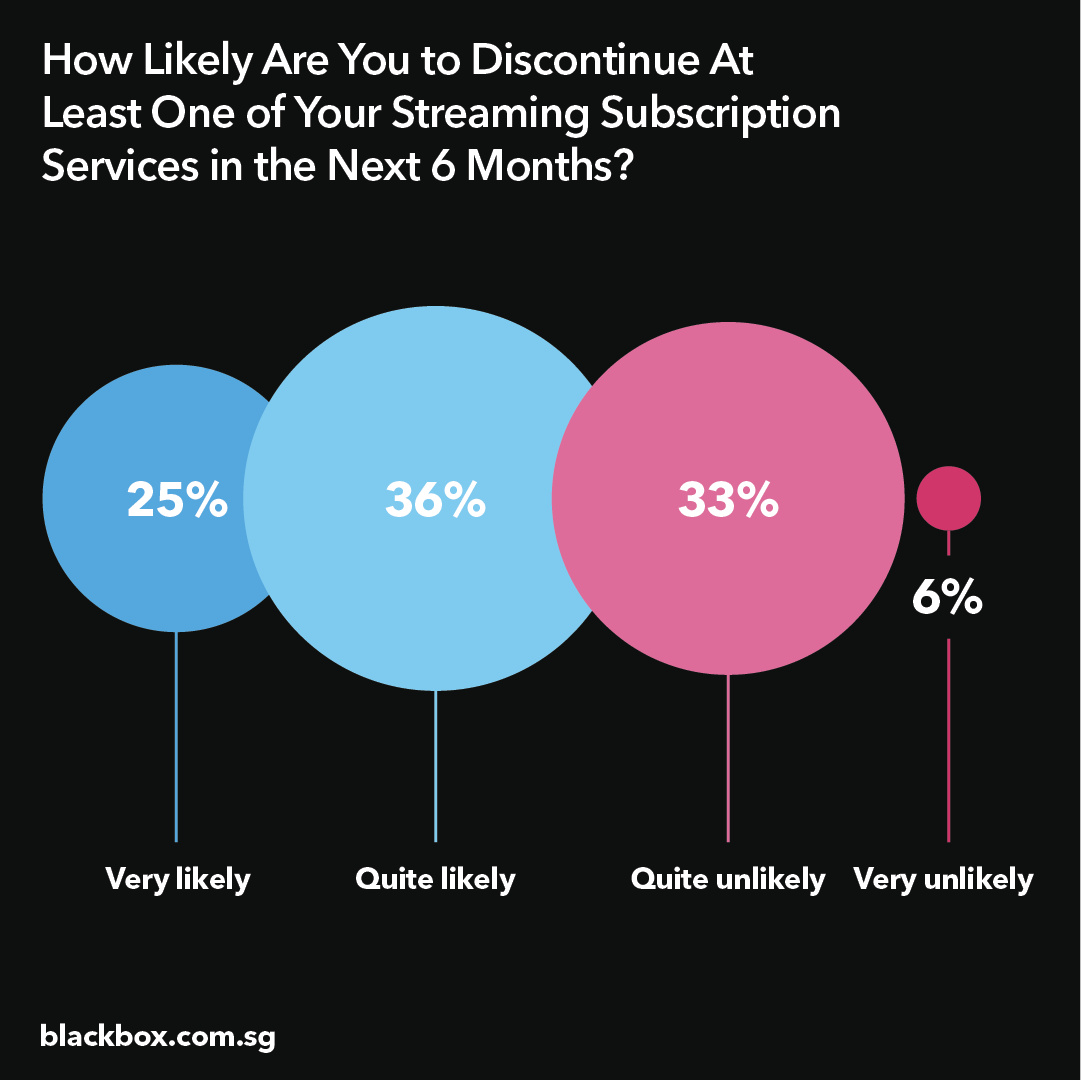

     Sources: https://blackbox.com.sg/everyone/streaming-services-in-singapore

8. Most used streaming platforms among consumers in 2022

    Showing that despite Netflix's slow downfall, it is still the most subscribed streaming service providers in Singapore. Further reinforcing the importance of retaining the most in demand shows on Netflix's library.

    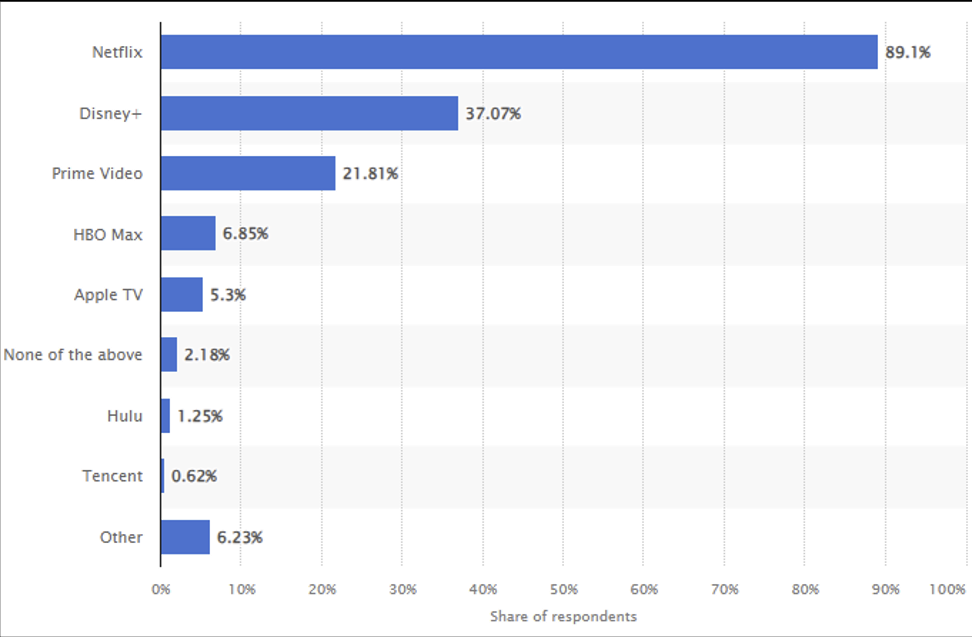

     Source: https://www.statista.com/statistics/1341646/singapore-popular-streaming-platforms-among-consumers/

# Data Import & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import random
import os
import ipywidgets as widgets
from IPython.display import display, HTML

# Import for string manipulations
import re
import string
import nltk

# Vectorization import
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Importing encoders
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer

# Modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
import gensim.utils
from sklearn.compose import ColumnTransformer

# Sentiment Analysis
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

import shap

#### Preparing master dataframe `sitcom_df` 

In [2]:
current_directory = os.getcwd()
file_path = os.path.join(current_directory, '../data/brooklynninenine_hot_full.csv')
df_b99 = pd.read_csv(file_path)
file_path = os.path.join(current_directory, '../data/bigbangtheory_hot_full.csv')
df_bbt = pd.read_csv(file_path)

df_b99.info()
display(df_b99.head())

df_bbt.info()
display(df_bbt.head())

# Preparing one final dataset to use for EDA
sitcom_df = pd.concat([df_bbt, df_b99]).reset_index(drop=True)
sitcom_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Columns: 114 entries, approved_at_utc to gallery_data
dtypes: bool(28), float64(25), int64(10), object(51)
memory usage: 688.9+ KB


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,is_gallery,media_metadata,gallery_data
0,NaN,brooklynninenine,Hi Mlepnos- I don't know you.,t2_cqeef7gs,False,NaN,0,False,Mlepclaynos,[],...,False,https://i.redd.it/wttzr18y276b1.jpg,731854,1.686841e+09,0,NaN,False,NaN,NaN,NaN
1,NaN,brooklynninenine,NaN,t2_vsxph4tc,False,NaN,0,False,Brooklyn 99 Bingo! Watch episodes at random un...,[],...,False,https://i.imgur.com/081XqRP.jpg,731854,1.686840e+09,0,NaN,False,NaN,NaN,NaN
2,NaN,brooklynninenine,NaN,t2_8lvshkfv,False,NaN,0,False,peraltiago irl,[],...,False,https://i.redd.it/wr3w8ez5496b1.jpg,731854,1.686865e+09,0,NaN,False,NaN,NaN,NaN
3,NaN,brooklynninenine,NaN,t2_qbybe,False,NaN,0,False,"Someone said they needed this, now. So enjoy m...",[],...,False,https://i.redd.it/pfdemmrz146b1.png,731854,1.686804e+09,0,NaN,False,NaN,NaN,NaN
4,NaN,brooklynninenine,Sorry for the poor quality.,t2_vieftcvf,False,NaN,0,False,Reminds me someone...,[],...,False,https://i.redd.it/hqyrsqyl676b1.jpg,731854,1.686842e+09,0,NaN,False,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Columns: 113 entries, approved_at_utc to author_cakeday
dtypes: bool(28), float64(26), int64(10), object(49)
memory usage: 682.5+ KB


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,is_video,url_overridden_by_dest,link_flair_template_id,is_gallery,media_metadata,gallery_data,crosspost_parent_list,crosspost_parent,poll_data,author_cakeday
0,NaN,bigbangtheory,Hi all! \nI made a The Big Bang Theory Discor...,t2_5fhfdvh8,False,NaN,0,False,Official Discord Server for r/bigbangtheory!,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,bigbangtheory,NaN,t2_10sfpj,False,NaN,0,False,New 'Big Bang Theory' Spinoff in Development a...,[],...,False,https://variety.com/2023/tv/news/big-bang-theo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,bigbangtheory,NaN,t2_36e33fdy,False,NaN,0,False,Why did Jim Parsons want to move on from the s...,"[{'e': 'text', 't': 'Character discussion'}]",...,False,NaN,76df9848-a507-11ed-8500-f6aef49379c2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,bigbangtheory,NaN,t2_hl49fcs,False,NaN,0,False,Sing Soft Wookie To Me,"[{'e': 'text', 't': 'meme'}]",...,False,https://i.redd.it/kmskyneum56b1.jpg,5d4e9c3c-4a35-11eb-9184-0e809bd389b1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,bigbangtheory,"For me, it’s raj. Socially inept (especially w...",t2_u4u8uade,False,NaN,0,False,Anyone here relate to a certain character and ...,"[{'e': 'text', 't': 'Other'}]",...,False,NaN,0723b4f2-a508-11ed-a8d2-6a2e44a39017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media_metadata,gallery_data,crosspost_parent_list,crosspost_parent,poll_data,author_cakeday,thumbnail_height,thumbnail_width,post_hint,preview
0,NaN,bigbangtheory,Hi all! \nI made a The Big Bang Theory Discor...,t2_5fhfdvh8,False,NaN,0,False,Official Discord Server for r/bigbangtheory!,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,bigbangtheory,NaN,t2_10sfpj,False,NaN,0,False,New 'Big Bang Theory' Spinoff in Development a...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,bigbangtheory,NaN,t2_36e33fdy,False,NaN,0,False,Why did Jim Parsons want to move on from the s...,"[{'e': 'text', 't': 'Character discussion'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,bigbangtheory,NaN,t2_hl49fcs,False,NaN,0,False,Sing Soft Wookie To Me,"[{'e': 'text', 't': 'meme'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,bigbangtheory,"For me, it’s raj. Socially inept (especially w...",t2_u4u8uade,False,NaN,0,False,Anyone here relate to a certain character and ...,"[{'e': 'text', 't': 'Other'}]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,NaN,brooklynninenine,NaN,t2_t263l,False,NaN,0,False,cheat day diet options,[],...,NaN,NaN,NaN,NaN,NaN,NaN,140.0,140.0,image,{'images': [{'source': {'url': 'https://previe...
1968,NaN,brooklynninenine,NaN,t2_f7bjpzku,False,NaN,0,False,"Wife got me this shirt out of the blue, though...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,140.0,140.0,image,{'images': [{'source': {'url': 'https://previe...
1969,NaN,brooklynninenine,NaN,t2_577olepf,False,NaN,0,False,Some say that makes Zeus my Dad...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,103.0,140.0,image,{'images': [{'source': {'url': 'https://previe...
1970,NaN,brooklynninenine,NaN,t2_13bfpx,False,NaN,0,False,"If you had to guess, which lines would you say...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,77.0,140.0,image,{'images': [{'source': {'url': 'https://previe...


**Verification and cleaning**
<br>Merging title and selftext into 'posts' column for easier analysis.

In [3]:
# Replace NaN values with empty strings, if not it cannot be merged together
sitcom_df['selftext'] = sitcom_df['selftext'].fillna('')
sitcom_df['posts'] = sitcom_df['title'] + ' ' + sitcom_df['selftext']
sitcom_df= sitcom_df[['posts', 'subreddit']]
# 'subreddit' renamed to avoid confusion with the actual 'subreddit' words in 'posts'
sitcom_df = sitcom_df.rename(columns={'subreddit': 'subreddit_'})
display(sitcom_df)

,posts,subreddit_
0,Official Discord Server for r/bigbangtheory! H...,bigbangtheory
1,New 'Big Bang Theory' Spinoff in Development a...,bigbangtheory
2,Why did Jim Parsons want to move on from the s...,bigbangtheory
3,Sing Soft Wookie To Me,bigbangtheory
4,Anyone here relate to a certain character and ...,bigbangtheory
...,...,...
1967,cheat day diet options,brooklynninenine
1968,"Wife got me this shirt out of the blue, though...",brooklynninenine
1969,Some say that makes Zeus my Dad...,brooklynninenine
1970,"If you had to guess, which lines would you say...",brooklynninenine


**Checking for null values**


In [4]:
sitcom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   posts       1972 non-null   object
 1   subreddit_  1972 non-null   object
dtypes: object(2)
memory usage: 30.9+ KB


In [5]:
sitcom_df['subreddit_'].unique()

array(['bigbangtheory', 'brooklynninenine'], dtype=object)

<br> No null values observed

**Checking for duplicate values**


In [6]:
# Showing 'posts' content with more than one occurrence 
vc = sitcom_df['posts'].value_counts()
vc[vc>1]

Episode where Sheldon looks hot? lol Hi guys,\nWas wondering if you could help me with something lol. My friend and I are debating if Sheldon is ever “attractive” in the series (he def is), and I’m trying to find this one specific episode, but I’m unsure which one it is. It’s where Sheldon is in a suit and he greets Amy at her apartment, he’s sitting in a chair and he’s being all SeDuCtIvE and stuff lol. I remember he looks HAWT. Could someone please tell me which episode this is? I think this will be the evidence I need to prove her wrong.\nThanks guys! Hahaha :)    4
Official Discord Server for r/bigbangtheory! Hi all!  \nI made a The Big Bang Theory Discord and it has now became the official r/bigbangtheory discord!  \nThere is:\n\n\- Weekly Rewatches\n\n\- Trivia\n\n\- A custom bot (that's in progress that will have lots of cool features!)\n\n\- A friendly community  \n\n\nCome join and say hi: [https://discord.gg/baDyeMjn3R](https://discord.gg/baDyeMjn3R)                          

<br>There are duplicated posts in the `sitcom_df` as shown above. Let's remove them with `drop_duplicates`.

In [7]:
# Drop all duplicated values in posts
sitcom_df = sitcom_df.drop_duplicates(subset=['posts']).reset_index(drop=True)
sitcom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   posts       1889 non-null   object
 1   subreddit_  1889 non-null   object
dtypes: object(2)
memory usage: 29.6+ KB


In [8]:
vc2 = sitcom_df['posts'].value_counts()
vc2[vc2>1]

Series([], Name: posts, dtype: int64)

All duplicated post were removed.

**Class Distribution**


,posts
subreddit_,
bigbangtheory,906
brooklynninenine,983


Ratio: 0.47961884595023824 0.5203811540497618


<Figure size 640x480 with 0 Axes>

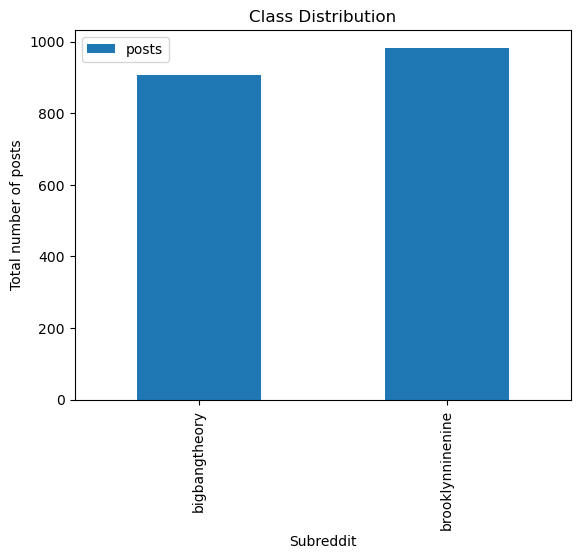

In [9]:
sitcom_df_count = sitcom_df.groupby('subreddit_').count()
display(sitcom_df_count)
print( 'Ratio:',
    sitcom_df_count['posts'][0]/sitcom_df_count['posts'].sum()
    , sitcom_df_count['posts'][1]/sitcom_df_count['posts'].sum()
)

# Plot subreddit distribution
plt.figure()
sitcom_df.groupby('subreddit_').count().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel("Subreddit")
plt.ylabel("Total number of posts")
plt.show()

The data used for our model consisted of 906 posts for bbt and 983 posts for b99. There difference is no more than 10% and can be considered to be equal.

# Feature Engineering

**Target Feature** 
<br>The `subreddit_` column, which is our target is not in numeric form. A label encoder is used to convert the datatype from string into integer.
<br>`0`: Big Bang Theory
<br>`1`: Brooklyn Nine Nine

In [10]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Sieve out the columns which we want to apply label encoding on
sitcom_df['subreddit_'] = label_encoder.fit_transform(sitcom_df['subreddit_'])
sitcom_df

,posts,subreddit_
0,Official Discord Server for r/bigbangtheory! H...,0
1,New 'Big Bang Theory' Spinoff in Development a...,0
2,Why did Jim Parsons want to move on from the s...,0
3,Sing Soft Wookie To Me,0
4,Anyone here relate to a certain character and ...,0
...,...,...
1884,cheat day diet options,1
1885,"Wife got me this shirt out of the blue, though...",1
1886,Some say that makes Zeus my Dad...,1
1887,"If you had to guess, which lines would you say...",1


**Length and Word Count of Posts**
<br>`len_posts` stores the total number of characters in `posts`.

In [11]:
sitcom_df['len_posts'] =  sitcom_df['posts'].apply(lambda x: len(x))
sitcom_df['post_word_count'] = sitcom_df['posts'].apply(lambda x: len(x.split()))
sitcom_df

,posts,subreddit_,len_posts,post_word_count
0,Official Discord Server for r/bigbangtheory! H...,0,385,55
1,New 'Big Bang Theory' Spinoff in Development a...,0,73,13
2,Why did Jim Parsons want to move on from the s...,0,113,20
3,Sing Soft Wookie To Me,0,23,5
4,Anyone here relate to a certain character and ...,0,138,22
...,...,...,...,...
1884,cheat day diet options,1,23,4
1885,"Wife got me this shirt out of the blue, though...",1,72,15
1886,Some say that makes Zeus my Dad...,1,35,7
1887,"If you had to guess, which lines would you say...",1,119,21


**Emojis**
<br>`emojis` and `num_emojis` are created to stored the emojis and number of emojis in each post.

In [12]:
# Function to detect emojis in a given text
def detect_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    emojis = emoji_pattern.findall(text)
    return emojis

sitcom_df['emojis'] = sitcom_df['posts'].apply(detect_emojis)

# Create the new column 'num_emojis' containing the number of emojis
sitcom_df['num_emojis'] = sitcom_df['emojis'].apply(lambda x: len(x))
sitcom_df

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis
0,Official Discord Server for r/bigbangtheory! H...,0,385,55,[],0
1,New 'Big Bang Theory' Spinoff in Development a...,0,73,13,[],0
2,Why did Jim Parsons want to move on from the s...,0,113,20,[],0
3,Sing Soft Wookie To Me,0,23,5,[],0
4,Anyone here relate to a certain character and ...,0,138,22,[],0
...,...,...,...,...,...,...
1884,cheat day diet options,1,23,4,[],0
1885,"Wife got me this shirt out of the blue, though...",1,72,15,[],0
1886,Some say that makes Zeus my Dad...,1,35,7,[],0
1887,"If you had to guess, which lines would you say...",1,119,21,[],0


**Sentiment Scores**
<br>The columns `neg`, `neu`, `pos` and `compound` are created to store the negative, neutral, positive and compound sentiment scores for each post.

In [13]:
def scores(s):
    sia = SIA()
    pol_score = sia.polarity_scores(s['posts'])
    return s.append(pd.Series(list(pol_score.values()), index=pol_score.keys()))

sitcom_df = sitcom_df.apply(scores, axis=1)
display(sitcom_df)

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
0,Official Discord Server for r/bigbangtheory! H...,0,385,55,[],0,0.127,0.690,0.183,0.5526
1,New 'Big Bang Theory' Spinoff in Development a...,0,73,13,[],0,0.000,1.000,0.000,0.0000
2,Why did Jim Parsons want to move on from the s...,0,113,20,[],0,0.000,0.943,0.057,0.0387
3,Sing Soft Wookie To Me,0,23,5,[],0,0.000,1.000,0.000,0.0000
4,Anyone here relate to a certain character and ...,0,138,22,[],0,0.070,0.837,0.093,0.1280
...,...,...,...,...,...,...,...,...,...,...
1884,cheat day diet options,1,23,4,[],0,0.500,0.500,0.000,-0.4588
1885,"Wife got me this shirt out of the blue, though...",1,72,15,[],0,0.000,0.848,0.152,0.3612
1886,Some say that makes Zeus my Dad...,1,35,7,[],0,0.000,1.000,0.000,0.0000
1887,"If you had to guess, which lines would you say...",1,119,21,[],0,0.000,1.000,0.000,0.0000


### Data Dictionary

| **Feature**         | **Type** | **Dataset**  | **Description**                                                  |
|---------------------|----------|--------------|------------------------------------------------------------------|
| **posts**           | object   | sitcom_df    | Combination of the reddit post title & the text in the main post |
| **subreddit_**      | interger | sitcom_df    | Target feature, where 0 = Big Bang Theory, 1 = Brooklyn Nine Nine|
| **len_posts**       | interger | sitcom_df    | Number of characters in a post                                   |
| **post_word_count** | integer  | sitcom_df    | Number of words in a post                                        |
| **emojis**          | objects  | sitcom_df    | Emojis found in a post                                           |
| **num_emojis**      | interger | sitcom_df    | Number of emojis found in a post                                 |
| **neg**             | interger | sitcom_df    | Negative sentiment values                                        |
| **neu**             | interger | sitcom_df    | Neutral sentiment values                                         |
| **pos**             | interger | sitcom_df    | Positive sentiment values                                        |
| **compound**        | interger | sitcom_df    | Compound sentiment values                                        |

# Exploratory Data Analysis

## EDA 1 - Word Frequency Visualisations
<br> Strings are passed into vectorizers to generate a word count dataframe for all unqiue words.  
<br> `clean_text(text)` serves to remove punctuations, tokenize the string and remove stopwords in `text`, to initialize the vectorizers.

In [14]:
# Punctuations to be removed from the text
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
# Tokenizers to split the strings into words
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

In [16]:
# Default stopwords from nltk
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# customizing stopwords
extra_stopwords = ['subreddit', 'subreddits', 
#                    'show', 'like', 'episode',
#                    'would', 'character','one', 'think', 'season', 'time',
#                    'get', 'favourite', 'say', 'really', 'im', 'first',
#                     # Round 2
#                    'know', 'favorite', 'see', 'make', 'anyone', 'also',
#                    'love', 'got',
#                     # Round 3
#                    'series', 'much', 'could', 'dont', 'way',
#                     #Round 4
#                    'thing', 'watching', 'go',
#                     #Round 5
#                    'watch', 'thought',
#                     # Round 6
#                    'guy', 'always',
#                     # Round 7
#                    'character', 'else', 'even',
#                     # Round 8
#                    'want',
#                     # Round 9
#                    'something', 'feel',
#                     # Round 10
#                    'year',
#                     # Round 11
#                    'good',
#                     # Round 12
#                    'still',
#                     # Round 13
#                    'best', 'made',
#                     # Not a text
#                    'ampx200b'
]


# Customized stopwords are added to the default stopwords from the nltk library
stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords

In [18]:
# Removes puntuation, tokenise the string & remove stopwords from the text

def clean_text(text):
    # Punctuation removal.
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    
    # Tokenisation.
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    
    # Apply lemmatisation and stopwords exclusion within the same step.
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
#     text = " ".join(text)
    return text

`get_plots(vectorizer, df)` passes the dataset `df` through the `vectorizer`. Based on the results, the word frequency and comparison charts of both subreddits in `df` are plotted.

In [19]:
# Get EDA plots by passing in the vectorizer

def get_plots(vectorizer, df):
    
    # X_counts stores the vectorized version of the data
    X_counts = vectorizer.fit_transform(df['posts'])
    print('Shape of vectorised dataset:', X_counts.shape)
    
    # Returns the unique words in the text.
    print('\nChecking feature names:', vectorizer.get_feature_names_out())
    
    # Convert the vectorized output into a dataframe
    X_count_df = pd.DataFrame(X_counts.todense(), 
                              columns=vectorizer.get_feature_names_out())

    # Adding in y-labels for visualisation     
    sitcom_count_df = pd.concat([X_count_df,df['subreddit_']], axis=1)
    
    try:
        sitcom_count_df.drop(columns=[''], inplace=True)
    except:
        print('\nNo \'\' to remove.')
        
    print('\nConverting vectorized dataset into dataframe, and adding labels:')
    display(sitcom_count_df)

# Split data into 2 subsets for EDA ----------------------------------------------------------------------------------- 

    bbt_cv_df = sitcom_count_df[sitcom_count_df['subreddit_']==0].drop('subreddit_', axis=1)
    bbt_top30 = bbt_cv_df.sum().sort_values(ascending=False).reset_index().head(30)
    bbt_top30.columns = ['words', 'count']
    
    b99_cv_df = sitcom_count_df[sitcom_count_df['subreddit_']==1].drop('subreddit_', axis=1)
    b99_top30 = b99_cv_df.sum().sort_values(ascending=False).reset_index().head(30)
    b99_top30.columns = ['words', 'count']

    # Create HTML table representations of the DataFrames with captions
    table1 = bbt_top30.style.set_caption('bbt_top30').to_html()
    table2 = b99_top30.style.set_caption('b99_top30').to_html()

    # Concatenate the HTML tables side by side
    html = '<table><tr><td>{}</td><td>{}</td></tr></table>'.format(table1, table2)

    print('\nComparing between the 2 datasets:')
    # Display the HTML table
    display(HTML(html))
    
    
# PLotting side-by-side frequency plots for each subreddit ---------------------------------------------------- 
    
    fig, (ax_bbt, ax_b99) = plt.subplots(nrows=1, ncols=2, figsize=(12,10))

    # Plotting for the 2 subreddits separately
    sns.barplot(data=bbt_top30, y='words', x='count', ax=ax_bbt)
    sns.barplot(data=b99_top30, y='words', x='count', ax=ax_b99)

    ax_bbt.set(title='Top 30 Used words for Big Bang Theory')
    ax_b99.set(title='Top 30 Used words for Brooklyn Nine Nine')

    plt.tight_layout()
    plt.show
    
# PLotting stacked bar chart for frequency comparison --------------------------------------------------------- 
    
    ## Adding new row ('Total') to plot the stacked bar chart in descending order

    # Group by 'subreddit_y' and sum the values for each column
    grouped_df = sitcom_count_df.groupby('subreddit_').sum()

    # Calculate the sum of each column and create a DataFrame for total row
    total_row = pd.DataFrame(grouped_df.sum()).T
    total_row.index = ['Total']
    total_row.rename_axis('subreddit_',inplace=True)

    # Concatenate the total row to the grouped DataFrame
    grouped_df = pd.concat([grouped_df, total_row])

    
    ## Sort by total sum:

    # Select the desired indexes for plotting (bigbangtheory, brooklynninenine, and Total)
    indexes = [0, 1, 'Total']

    # Select the rows to plot 
    columns_to_plot = grouped_df.loc[indexes].T.sort_values(by='Total', ascending=False).head(30)
    columns_to_plot.drop('Total', axis=1, inplace=True)

    # Plot the stacked bar chart
    ax = columns_to_plot.plot(kind='barh', stacked=True)

    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.title('Top 30 common words from both subreddits combined (Tag: Hot)')

    # Modify the legend name
    legend_labels = ['bigbangtheory', 'brooklynninenine']
    ax.legend(legend_labels)
    
    plt.show()
    
    print('Top 30 common words from both subreddits combined (Tag: Hot)')
    display(columns_to_plot.head(10))

**In the following section, the vectorizers below are used to vectorize the words, and the frequency charts are displayed.**
<br>**A. CountVectorizer (Single word)**
<br>**B. TfidfVectorizer**
<br>**C. CountVectorizer (Bigrams)**
<br>**D. CountVectorizer (Trigrams)**

### A. CountVectorizer (Single word)

Shape of vectorised dataset: (1889, 7628)

Checking feature names: ['' '0' '0400ish' ... 'zoom' 'zoomins' '½']

Converting vectorized dataset into dataframe, and adding labels:


,0,0400ish,05,07x04,07x05,08,1,10,100,10th,...,zeep,zero,zeus,zimble,zinger,zoo,zoom,zoomins,½,subreddit_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1886,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1



Comparing between the 2 datasets:


,words,count
0,sheldon,518
1,penny,333
2,show,283
3,like,263
4,leonard,262
5,episode,247
6,would,240
7,character,233
8,howard,195
9,raj,190


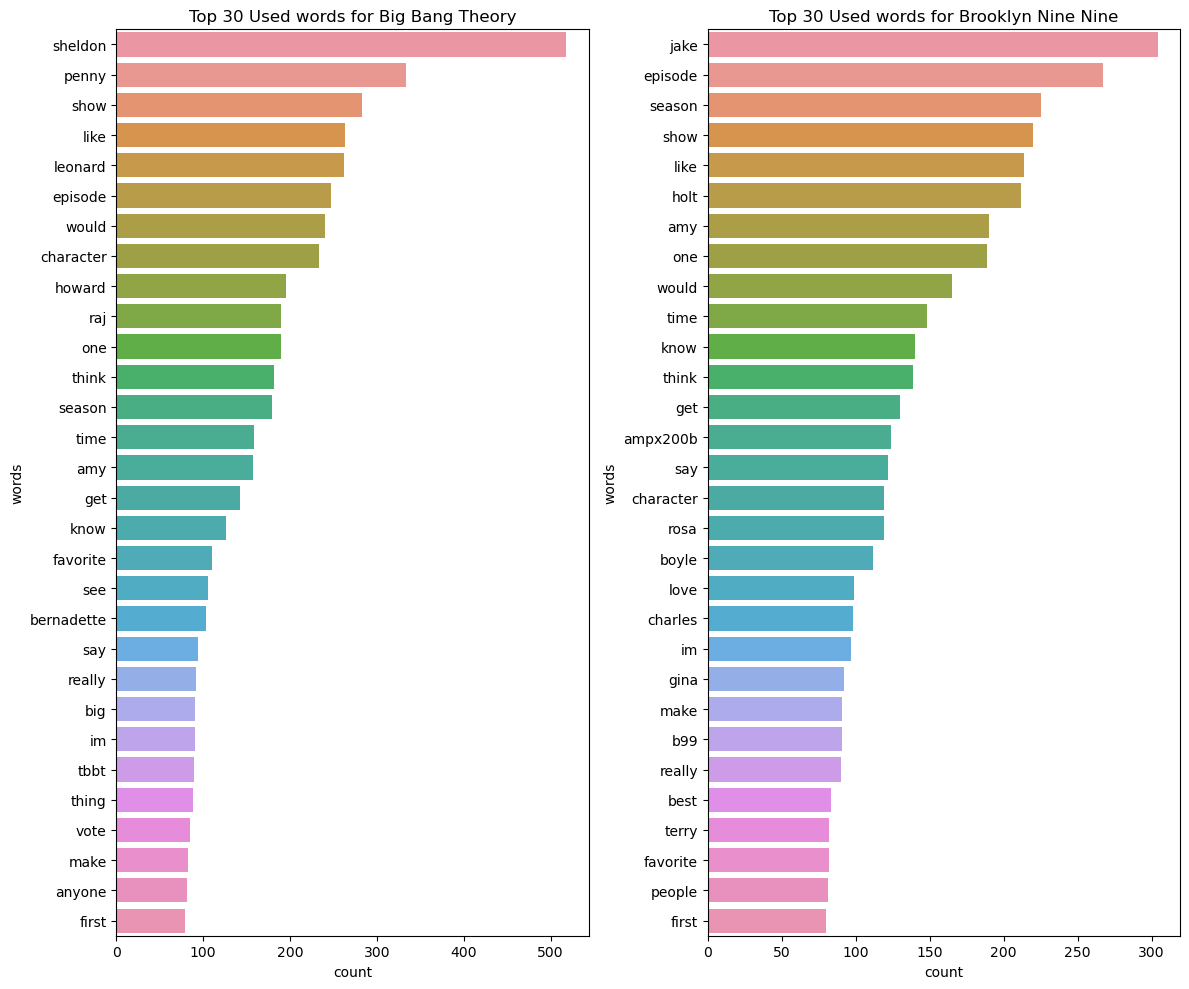

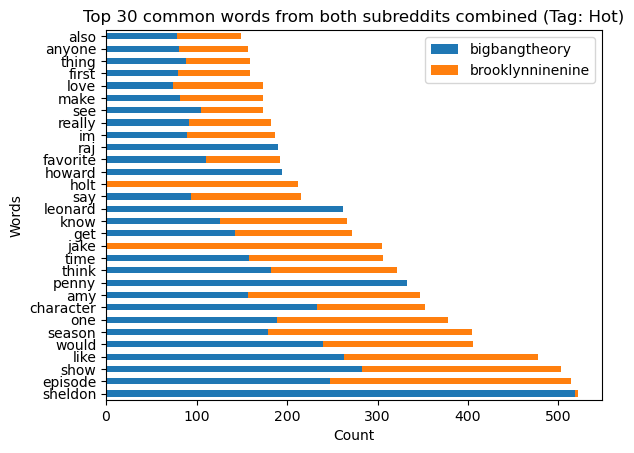

Top 30 common words from both subreddits combined (Tag: Hot)


subreddit_,0,1
sheldon,518,4
episode,247,267
show,283,220
like,263,214
would,240,165
season,179,225
one,189,189
character,233,119
amy,157,190
penny,333,0


In [20]:
# Create an instance of CountVectorizer and pass in the clean_text function as the analyzer parameter
count_vect = CountVectorizer(analyzer=clean_text)
get_plots(count_vect, sitcom_df)

**Key Findings:**

**From the top 30 most used words graphs:**
- character names are widely observed, such as 'sheldon' and 'penny' for bigbangtheory, and 'jake' and 'amy' for brooklynninennine.
- An interesting find is the word ‘Young’, which is seen on BBT very often due to the sequel, which is popular as well.
- Another interesting comparison is the common use of ‘Season’ in bigbangtheory versus the common use of ‘Scene’ in brooklynninenine, showing a different focus of discussion for both shows.



**From the combined frequency graphs:** 
- Common words between the two subreddits are observed, such as 'episode', 'show', 'like', and 'would'. Even though the default stopwords (ie. words removed) have already included (filler) words that people commonly use on a daily basis, but it failed to filter out words that are specific to a sitcom context. 
- Such words are hypothesized to affect the model accuracy since words that frequently appear in both subreddits do not seem to be a strong predictor of either category. Hence, these words have been progressively included in the extra_stopwords list till no common words are seen in the top 30 list, and are taken into consideration while running the models. 
- Suprisingly, after analysis, it was found that the accuracy has reduced with the addition of such stopwords. Hence, they are commented out in the stopword list.



### B. TfidfVectorizer

Shape of vectorised dataset: (1889, 7628)

Checking feature names: ['' '0' '0400ish' ... 'zoom' 'zoomins' '½']

Converting vectorized dataset into dataframe, and adding labels:


,0,0400ish,05,07x04,07x05,08,1,10,100,10th,...,zeep,zero,zeus,zimble,zinger,zoo,zoom,zoomins,½,subreddit_
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.731112,0.0,0.0,0.0,0.0,0.0,0.0,1
1887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1



Comparing between the 2 datasets:


,words,count
0,sheldon,48.990250
1,penny,33.801699
2,leonard,27.185009
3,show,22.939581
4,would,22.849649
5,episode,22.568994
6,howard,22.146858
7,raj,21.254671
8,think,19.725994
9,like,19.094103


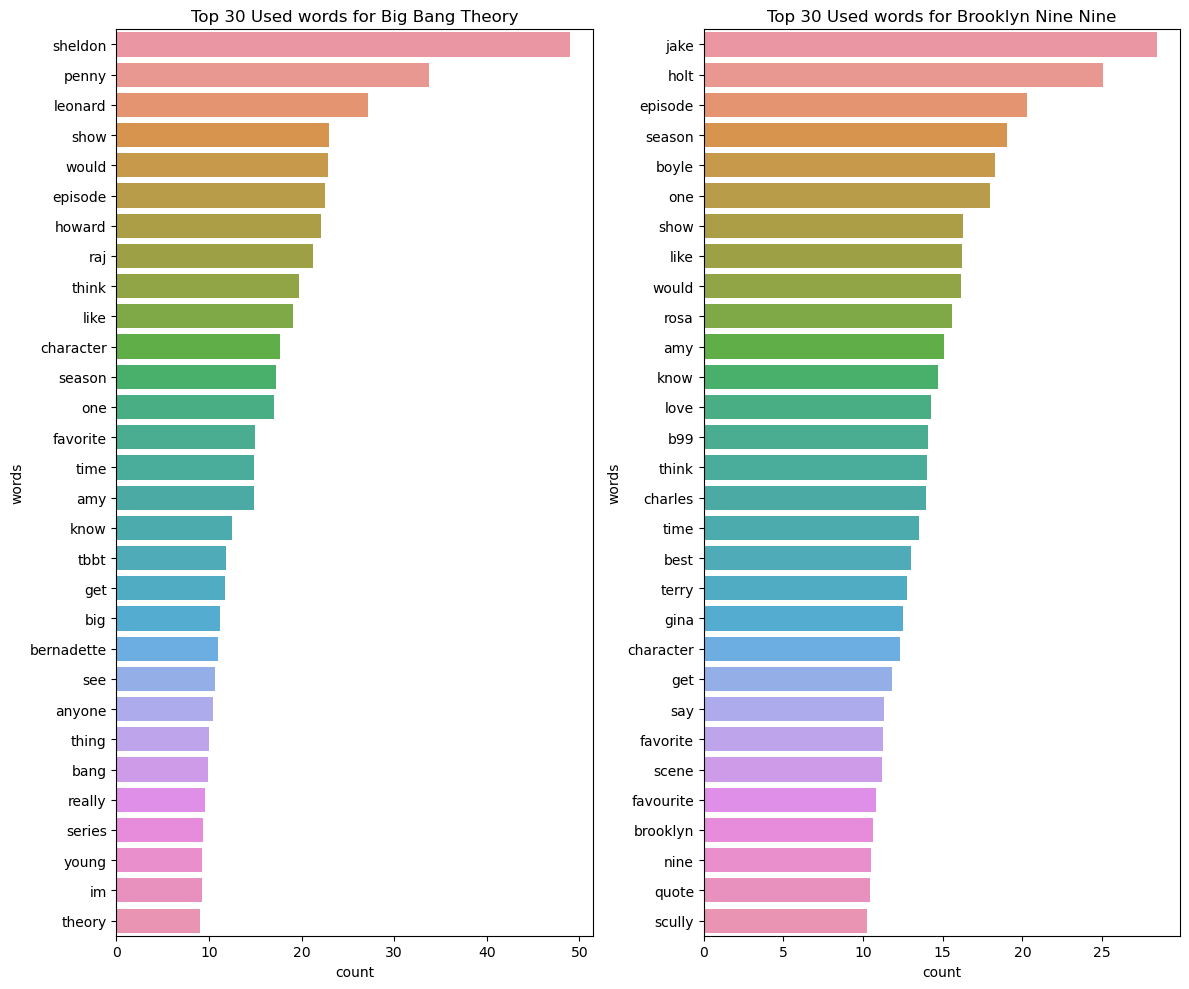

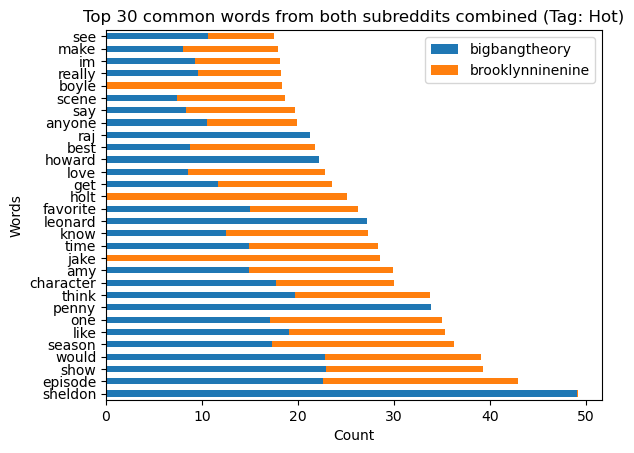

Top 30 common words from both subreddits combined (Tag: Hot)


subreddit_,0,1
sheldon,48.990250,0.196288
episode,22.568994,20.313140
show,22.939581,16.260769
would,22.849649,16.163302
season,17.260275,19.019420
like,19.094103,16.179861
one,17.037706,17.980968
penny,33.801699,0.000000
think,19.725994,13.984133
character,17.716980,12.302021


In [21]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
get_plots(tfidf_vect, sitcom_df)

**Key Findings:**
- Similar observations from CountVectorizer (Single Word) are found for TF-IDF Vectorizer results.

### C. CountVectorizer (Bigrams)

Since Bigrams use 2 words, the customized stopwords that were removed may have an impact on it. Additionally, Bigram requires the whole string to be returned from the vectorizer. Hence, let's use the default stopwords and create another function for the text cleaning.

In [22]:
extra_stopwards_bi = ['ampx200b']
stopwords_bi = nltk.corpus.stopwords.words('english') + extra_stopwards_bi

In [23]:
# Define a function that removes puntuation, tokenise the string & remove stopwords for bigram
def clean_text_bi(text):
    # Punctuation removal.
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
    # Apply lemmatisation and stopwords exclusion within the same step.
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords_bi])
    return text

In [24]:
#Preprocess and prepare a copy of data to pass into get_plots()
sitcom_df_bi = sitcom_df.copy()
sitcom_df_bi['posts'] = sitcom_df_bi['posts'].apply(lambda x: clean_text_bi(x))
sitcom_df_bi.head()

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
0,official discord server rbigbangtheory hi made...,0,385,55,[],0,0.127,0.690,0.183,0.5526
1,new big bang theory spinoff development hbo ma...,0,73,13,[],0,0.000,1.000,0.000,0.0000
2,jim parson want move show character continues ...,0,113,20,[],0,0.000,0.943,0.057,0.0387
3,sing soft wookie,0,23,5,[],0,0.000,1.000,0.000,0.0000
4,anyone relate certain character raj socially i...,0,138,22,[],0,0.070,0.837,0.093,0.1280


Shape of vectorised dataset: (1889, 35364)

Checking feature names: ['05 pissed' '07x04 discus' '07x05 sheldon' ... 'zoom rosa' 'zoom use'
 'zoomins tie']

No '' to remove.

Converting vectorized dataset into dataframe, and adding labels:


,05 pissed,07x04 discus,07x05 sheldon,08 s4,10 11,10 day,10 episode,10 etc,10 feeling,10 game,...,zero sense,zeus dad,zimble interested,zinger like,zinger two,zoo make,zoom rosa,zoom use,zoomins tie,subreddit_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1886,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1



Comparing between the 2 datasets:


,words,count
0,big bang,69
1,young sheldon,59
2,bang theory,50
3,least favorite,33
4,anyone else,31
5,feel like,28
6,season episode,27
7,leonard penny,24
8,first time,19
9,vote least,18


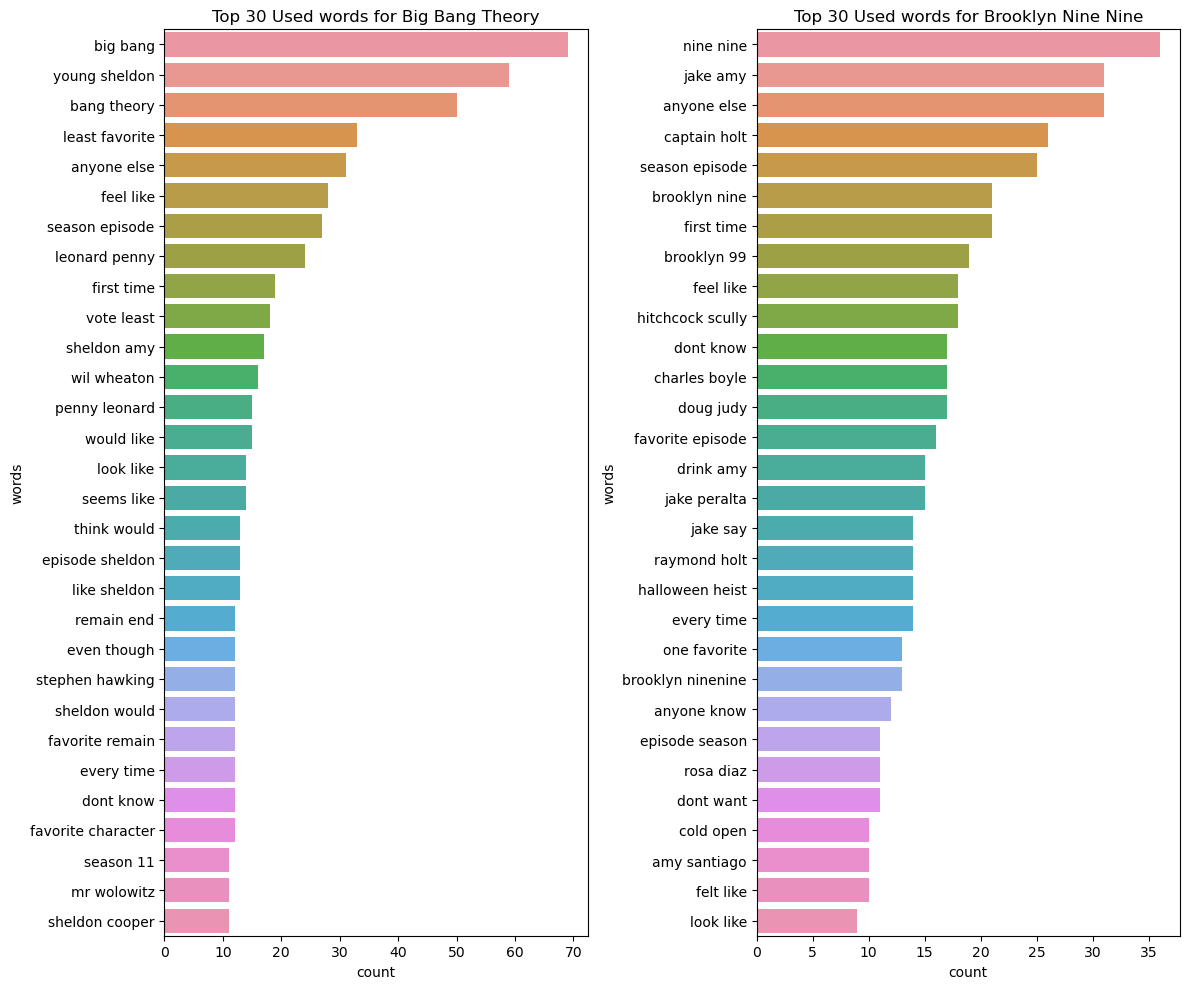

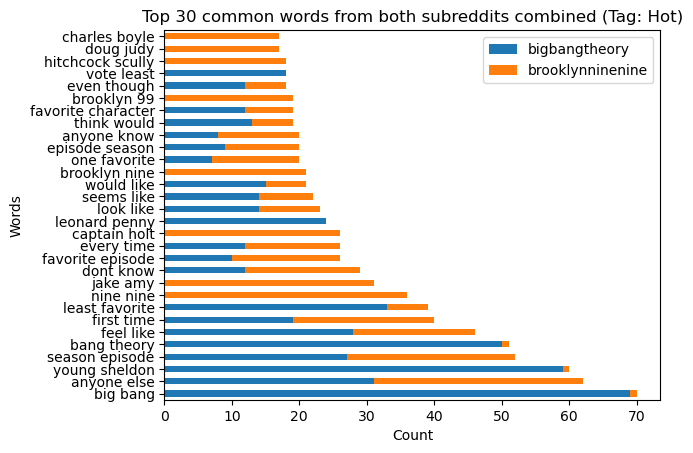

Top 30 common words from both subreddits combined (Tag: Hot)


subreddit_,0,1
big bang,69,1
anyone else,31,31
young sheldon,59,1
season episode,27,25
bang theory,50,1
feel like,28,18
first time,19,21
least favorite,33,6
nine nine,0,36
jake amy,0,31


In [25]:
# Create an instance of CountVectorizer for Bigrams
ngram_vect = CountVectorizer(ngram_range=(2,2))
get_plots(ngram_vect, sitcom_df_bi)

**Key findings:**
- ‘Cold Open’ is a unique X-factor in B99
- ‘Least Favourite’ is found in BBT
- ‘Halloween Heist’ is also a unique X-factor in B99
- ‘Sheldon’ has strong impact on viewers


### D. CountVectorizer (Trigrams)

Similar to Bigrams, we have to prepare new stopwords and clean_text function for Trigrams.

In [26]:
extra_stopwords_tri =['episode', 'like', 'show', 'ampx200b', 'character']
stopwords_tri = nltk.corpus.stopwords.words('english') + extra_stopwords_tri

In [27]:
# Define a function that removes puntuation, tokenise the string & remove stopwords
def clean_text_tri(text):
    # Punctuation removal.
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
    # Apply lemmatisation and stopwords exclusion within the same step.
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords_tri])
    return text

In [28]:
sitcom_df_tri = sitcom_df.copy()
sitcom_df_tri['posts'] = sitcom_df_tri['posts'].apply(lambda x: clean_text_tri(x))
sitcom_df_tri

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
0,official discord server rbigbangtheory hi made...,0,385,55,[],0,0.127,0.690,0.183,0.5526
1,new big bang theory spinoff development hbo ma...,0,73,13,[],0,0.000,1.000,0.000,0.0000
2,jim parson want move continues produce narrate...,0,113,20,[],0,0.000,0.943,0.057,0.0387
3,sing soft wookie,0,23,5,[],0,0.000,1.000,0.000,0.0000
4,anyone relate certain raj socially inept espec...,0,138,22,[],0,0.070,0.837,0.093,0.1280
...,...,...,...,...,...,...,...,...,...,...
1884,cheat day diet option,1,23,4,[],0,0.500,0.500,0.000,-0.4588
1885,wife got shirt blue thought folk would,1,72,15,[],0,0.000,0.848,0.152,0.3612
1886,say make zeus dad,1,35,7,[],0,0.000,1.000,0.000,0.0000
1887,guess line would say improvised partially impr...,1,119,21,[],0,0.000,1.000,0.000,0.0000


Shape of vectorised dataset: (1889, 5000)

Checking feature names: ['05 pissed amy' '11 season 12' '1214 participate reddit' ...
 'young sheldon meemaw' 'young sheldon see' 'young sheldon watch']

No '' to remove.

Converting vectorized dataset into dataframe, and adding labels:


,05 pissed amy,11 season 12,1214 participate reddit,24 dr gablehauser,25 leslie winkle,26 colonel williams,27 beverly 28,28 anu 29,29 priya 30,2nd place day,...,wrong 23 time,yellow crested warbler,yesterday 2nd place,yesterday comment consistent,youd think would,young sheldon amp,young sheldon meemaw,young sheldon see,young sheldon watch,subreddit_
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1



Comparing between the 2 datasets:


,words,count
0,big bang theory,50
1,vote least favorite,18
2,favorite remain end,12
3,hawking mike massimino,9
4,halley since babychild,9
5,note included character,9
6,character round vote,9
7,character based number,9
8,well see favorite,9
9,mike massimino played,9


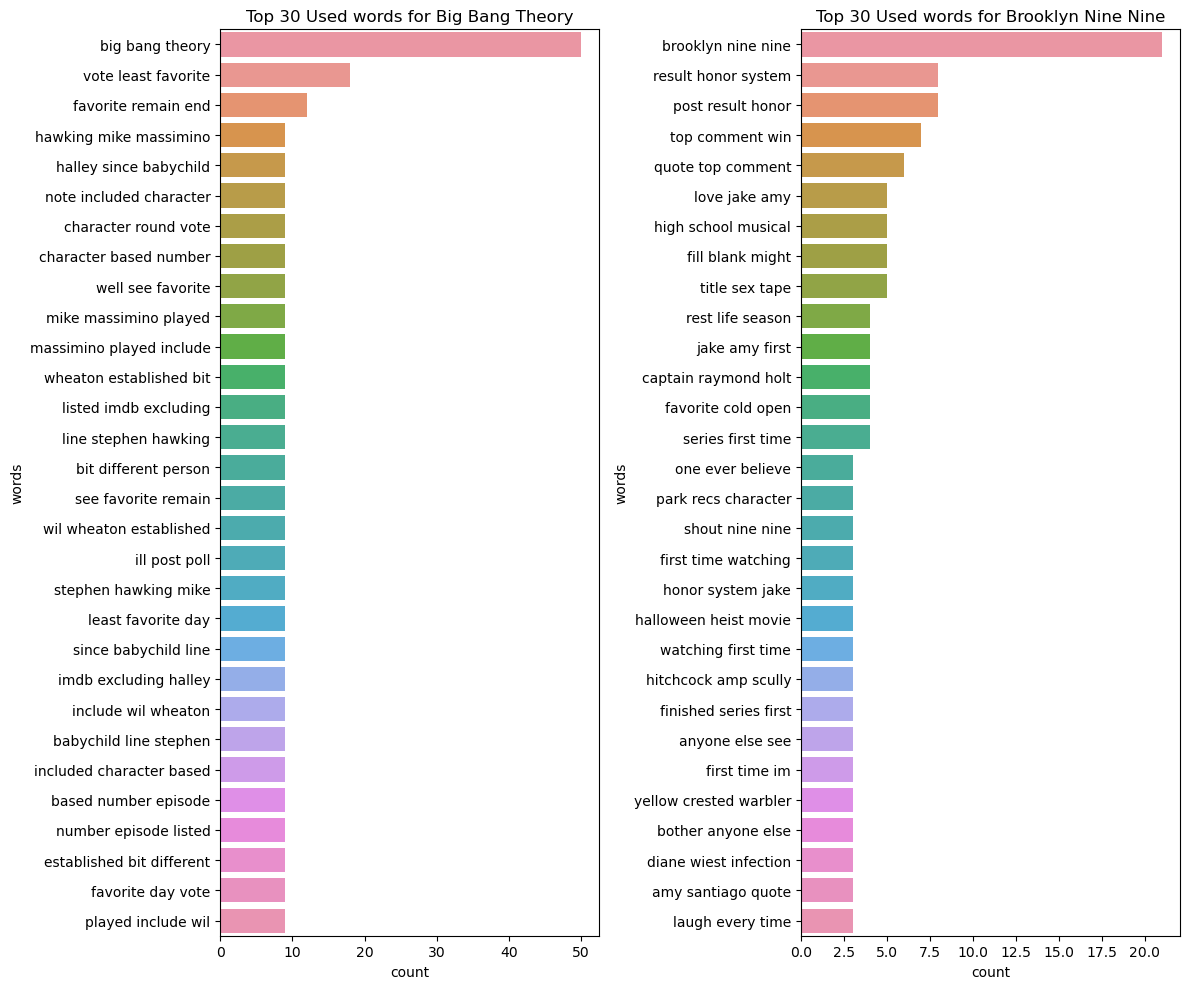

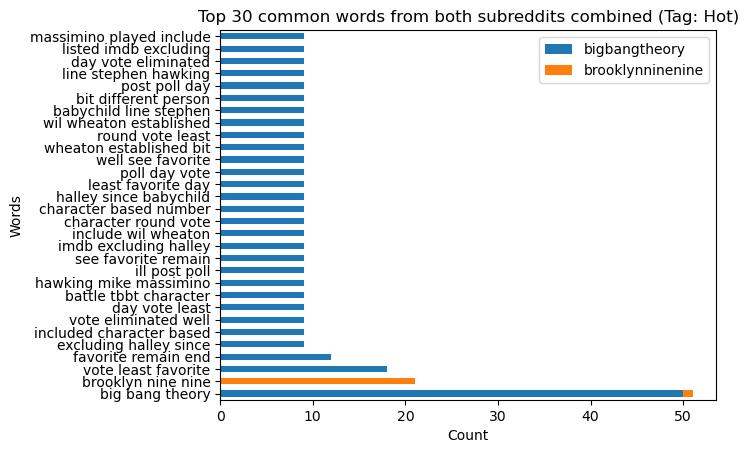

Top 30 common words from both subreddits combined (Tag: Hot)


subreddit_,0,1
big bang theory,50,1
brooklyn nine nine,0,21
vote least favorite,18,0
favorite remain end,12,0
excluding halley since,9,0
included character based,9,0
vote eliminated well,9,0
day vote least,9,0
battle tbbt character,9,0
hawking mike massimino,9,0


In [29]:
ngram_vect_tri = CountVectorizer(ngram_range=(3,3), max_features = 5000)
get_plots(ngram_vect_tri, sitcom_df_tri)

**Key Findings:**
- Aside from 'big bang theory' and 'brooklyn nine nine' that have expectly high occurrence rate since they are the names of the show, not much can be derived from the results, since the rest of the phrases have rather similar and low occurrence frequency.

## EDA 2 - Visualizations on Post Length, Word Count and Emoji Count

In [30]:
sitcom_df.head()

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
0,Official Discord Server for r/bigbangtheory! H...,0,385,55,[],0,0.127,0.690,0.183,0.5526
1,New 'Big Bang Theory' Spinoff in Development a...,0,73,13,[],0,0.000,1.000,0.000,0.0000
2,Why did Jim Parsons want to move on from the s...,0,113,20,[],0,0.000,0.943,0.057,0.0387
3,Sing Soft Wookie To Me,0,23,5,[],0,0.000,1.000,0.000,0.0000
4,Anyone here relate to a certain character and ...,0,138,22,[],0,0.070,0.837,0.093,0.1280


### A. Word Count and Post Length

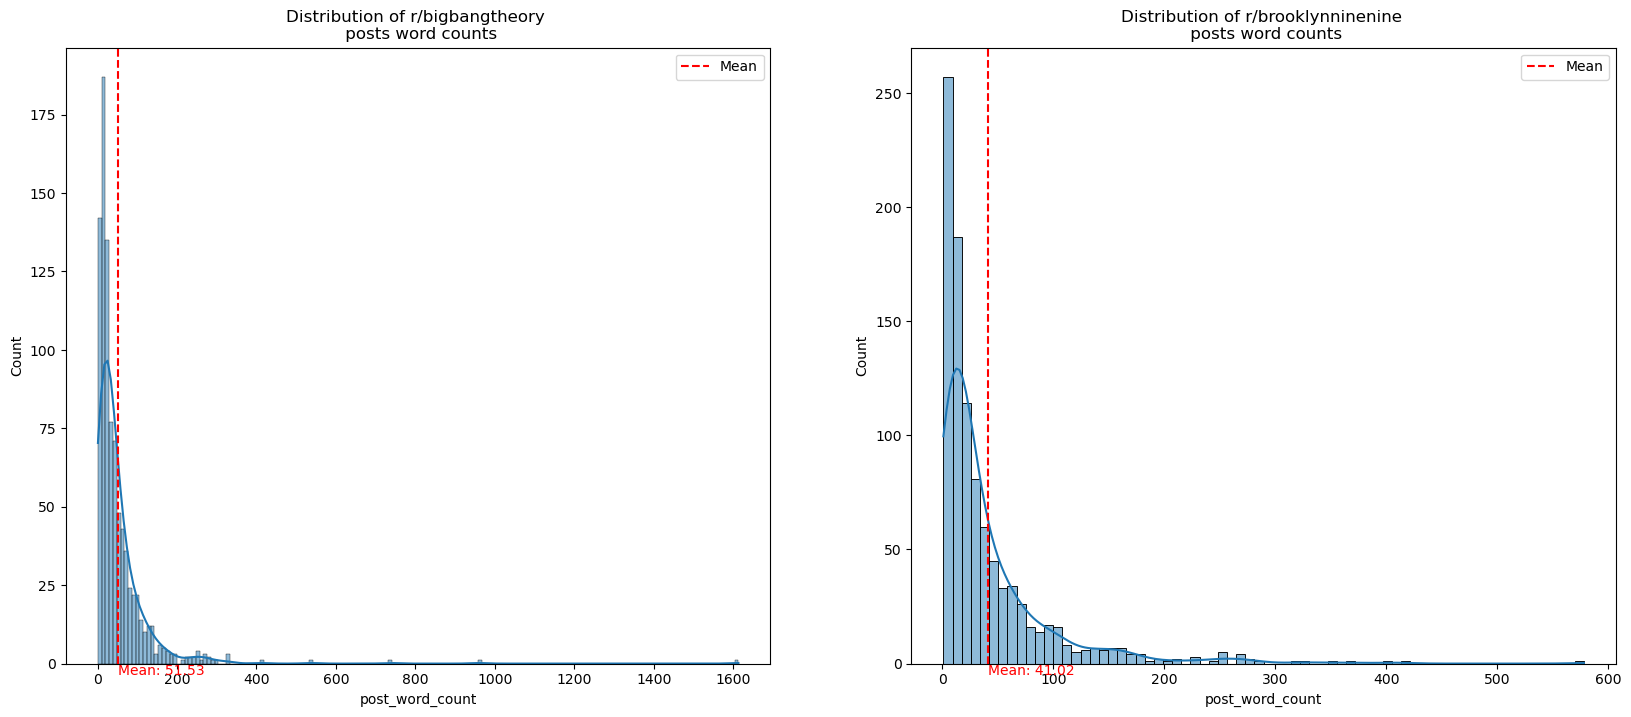

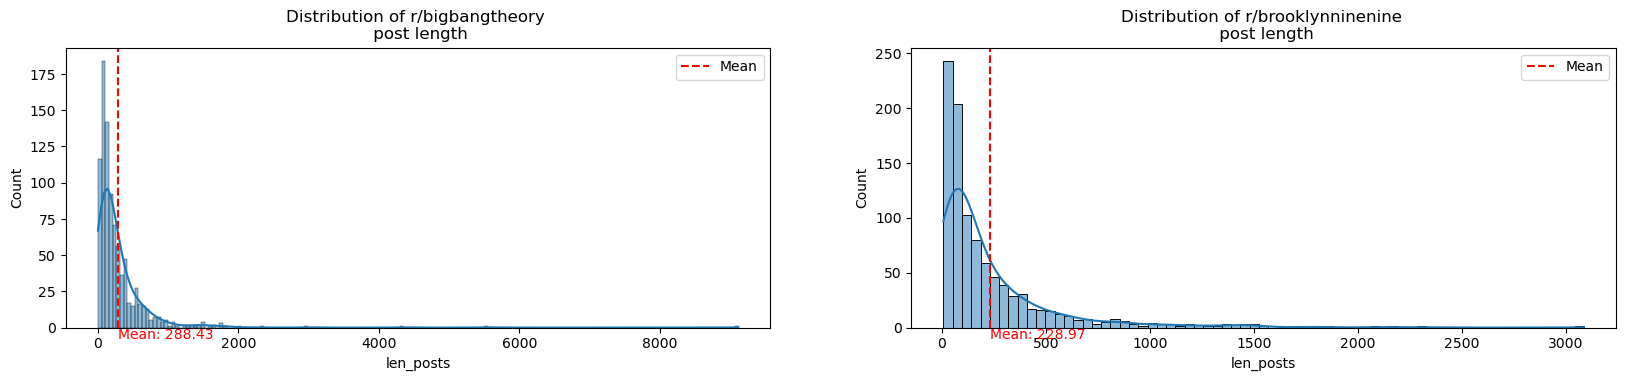

In [31]:
plt.figure(figsize=(20, 8))

# Plotting word count distribution for 'bigbangtheory'
plt.subplot(1, 2, 1)
sns.histplot(sitcom_df[sitcom_df['subreddit_'] == 0]['post_word_count'], kde=True)
plt.title('Distribution of r/bigbangtheory \n posts word counts')
mean_value = sitcom_df[sitcom_df['subreddit_'] == 0]['post_word_count'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.text(mean_value, 0, f'Mean: {mean_value:.2f}', color='red', ha='left', va='top')
plt.legend()

# Plotting word count distribution for 'brooklynninenine'
plt.subplot(1, 2, 2)
sns.histplot(sitcom_df[sitcom_df['subreddit_'] == 1]['post_word_count'], kde=True)
plt.title('Distribution of r/brooklynninenine \n posts word counts')
mean_value = sitcom_df[sitcom_df['subreddit_'] == 1]['post_word_count'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.text(mean_value, 0, f'Mean: {mean_value:.2f}', color='red', ha='left', va='top')
plt.legend()

plt.figure(figsize=(20, 8))

# Plotting post length distribution for 'bigbangtheory' 
plt.subplot(2, 2, 1)
sns.histplot(sitcom_df[sitcom_df['subreddit_'] == 0]['len_posts'], kde=True)
plt.title('Distribution of r/bigbangtheory \n post length')
mean_value = sitcom_df[sitcom_df['subreddit_'] == 0]['len_posts'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.text(mean_value, 0, f'Mean: {mean_value:.2f}', color='red', ha='left', va='top')
plt.legend()

# Plotting post length distribution for 'brooklynninenine'
plt.subplot(2, 2, 2)
sns.histplot(sitcom_df[sitcom_df['subreddit_'] == 1]['len_posts'], kde=True)
plt.title('Distribution of r/brooklynninenine \n post length')
mean_value = sitcom_df[sitcom_df['subreddit_'] == 1]['len_posts'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.text(mean_value, 0, f'Mean: {mean_value:.2f}', color='red', ha='left', va='top')
plt.legend()


plt.show()

**Key Findings:**
- All distributions are right skewed; most of the posts are of low word count and short post length.
- In general, both the mean word count and post length are higher for bigbangtheory, by 25%, indicating that bigbangtheory viewers have more to talk about for the show.

### B. Further Analysis on Length of post

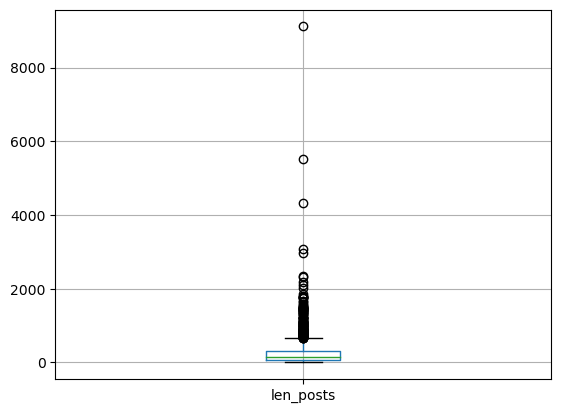

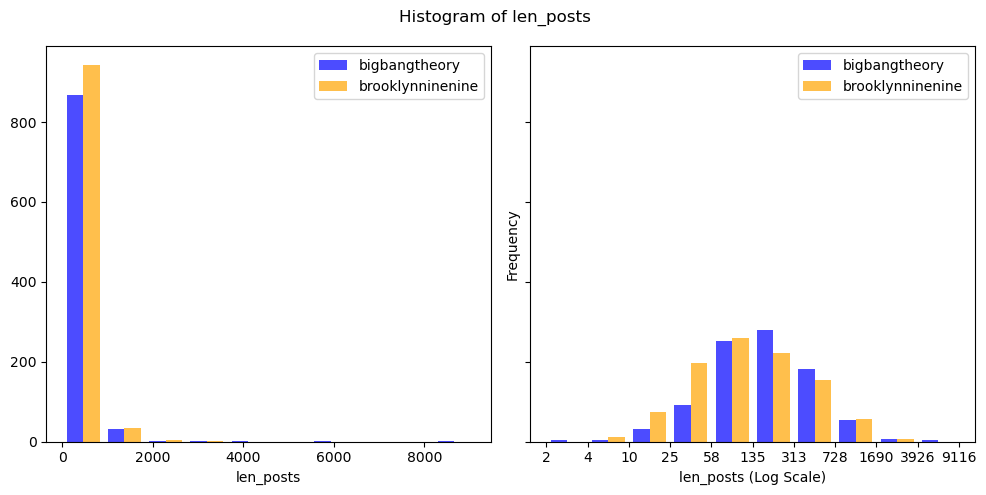

In [32]:
## Show boxplot
sitcom_df[['len_posts']].boxplot()

# Apply logarithm to the 'len_posts' column
log_len_posts = np.log(sitcom_df['len_posts'])

# Create a figure and two subplots (axes)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot histogram for each category separately
subreddit_0 = sitcom_df.loc[sitcom_df['subreddit_'] == 0, 'len_posts']
subreddit_1 = sitcom_df.loc[sitcom_df['subreddit_'] == 1, 'len_posts']

ax1.hist([subreddit_0, subreddit_1], color=['blue', 'orange'], label=['bigbangtheory', 'brooklynninenine'], alpha=0.7)
ax1.set_xlabel('len_posts')
ax1.legend()

# Plot the histogram with log scaled x-axis on the right side
n, bins, patches = ax2.hist([log_len_posts.loc[sitcom_df['subreddit_'] == 0], log_len_posts.loc[sitcom_df['subreddit_'] == 1]],
                           color=['blue', 'orange'], label=['bigbangtheory', 'brooklynninenine'], alpha=0.7)
ax2.set_xlabel('len_posts (Log Scale)')
ax2.set_ylabel('Frequency')

ax2.set_xticks(ticks=bins)
ax2.set_xticklabels(labels=np.exp(bins).astype(int))
ax2.legend()

fig.suptitle('Histogram of len_posts')

fig.tight_layout()
plt.show()


**Key Findings:**
- Majority of post lengths in both subreddits are below 1000 character counts; this translates to between 140-250 words . There are also numerous posts with no selftext.
<br>(Source: https://capitalizemytitle.com/character-count/1000-characters/)

### B. Number of Emojis

In [33]:
sitcom_df.head()

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
0,Official Discord Server for r/bigbangtheory! H...,0,385,55,[],0,0.127,0.690,0.183,0.5526
1,New 'Big Bang Theory' Spinoff in Development a...,0,73,13,[],0,0.000,1.000,0.000,0.0000
2,Why did Jim Parsons want to move on from the s...,0,113,20,[],0,0.000,0.943,0.057,0.0387
3,Sing Soft Wookie To Me,0,23,5,[],0,0.000,1.000,0.000,0.0000
4,Anyone here relate to a certain character and ...,0,138,22,[],0,0.070,0.837,0.093,0.1280


Checking rows with emojis present:

In [34]:
# Filter the dataframe to show rows with non-empty lists in the 'emojis' column
sitcom_df[sitcom_df['emojis'].apply(lambda x: len(x) > 0)]

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
10,"The “Dumb Hot Guy” character, for this ex Zack...",0,704,127,[💨💨],1,0.036,0.793,0.171,0.9517
26,I ate a butterfly! 😳 This is my favorite Howar...,0,82,17,[😳],1,0.000,0.784,0.216,0.5550
34,has anyone else cried bc of the show or am I j...,0,360,68,[😭],1,0.202,0.695,0.104,-0.8159
53,🙌,0,2,1,[🙌],1,0.000,0.000,0.000,0.0000
111,I had a weird BBT dream but it was wholesome a...,0,1311,265,"[😂, 😅, 😊, 😂]",4,0.090,0.656,0.254,0.9950
...,...,...,...,...,...,...,...,...,...,...
1779,b99 flashback detail i love rewatching for the...,1,285,49,[🏾],1,0.000,0.894,0.106,0.6369
1790,Top tier spirit animal 🤌🏻,1,26,5,[🏻],1,0.000,0.462,0.538,0.3612
1851,Why didnt holt use the wuntch blackmail?? \nIn...,1,1057,185,[😭],1,0.061,0.873,0.066,0.5939
1858,Rosa couldn't help but smile after Charles ins...,1,66,11,[😂],1,0.533,0.467,0.000,-0.7902


In [35]:
print(sitcom_df['posts'][10])
print(sitcom_df['posts'][111])

The “Dumb Hot Guy” character, for this ex Zack So while my question applies to many comedies, I’m using BBT as the example. 
I understand it’s a common comedic tool to have the “dumb hot guy”… however I can’t really think of a time/show where it has been done in a believable fashion. 
Sure, I’ve met some… less then intelligent people. But more often I would compare them to a Penny type character. 
IMO a lot of the things Zach says are immensely lacking anything tangible to me. Yes, I understand it’s for comedic effect and therefore exaggerated. I guess it’s just too far for me??? (Or Joey in Friends, getting dumber each season for ex. Also) 
I hope I’m explaining my reasoning in this 💨💨 tangent.
I had a weird BBT dream but it was wholesome and it left me wishing it was true😂 idk who to share this with bcause nobody else in my circle of friends watches BBT. So I'm just sharing it here if anybody even reads it😅 So if you would also like to share your weird or funny dreams abt BBT please 

Inaccuracies in number of emojis identified:
- Emojis that are typed together are identified as 1 emoji.
- Separate repeated emojis are identified as 1 emoji.

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


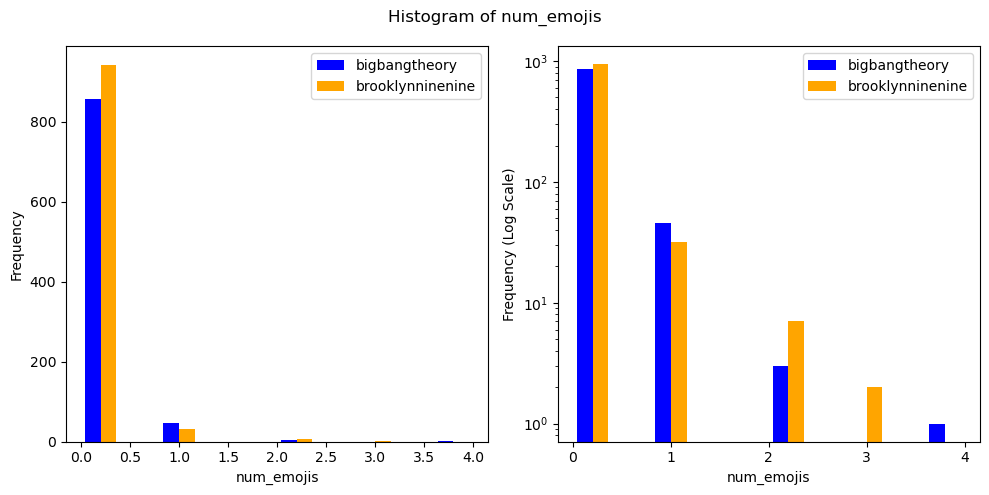

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=False)

# Extract data for each category
subreddit_0_data = sitcom_df.loc[sitcom_df['subreddit_'] == 0, 'num_emojis']
subreddit_1_data = sitcom_df.loc[sitcom_df['subreddit_'] == 1, 'num_emojis']

# Left plot
ax1.hist([subreddit_0_data, subreddit_1_data], color=['blue', 'orange'], label=['bigbangtheory', 'brooklynninenine'])
ax1.set_xlabel('num_emojis')
ax1.set_ylabel('Frequency')
ax1.legend()

# Right plot with a logged y-axis and integer x-axis
ax2.hist([subreddit_0_data, subreddit_1_data], color=['blue', 'orange'], label=['bigbangtheory', 'brooklynninenine'])
ax2.set_xlabel('num_emojis')
ax2.set_ylabel('Frequency (Log Scale)')
ax2.set_yscale('log')
ax2.set_xticks(range(5))  
ax2.set_xticklabels(range(5)) 
ax2.legend()

fig.suptitle('Histogram of num_emojis')

fig.tight_layout()
plt.show()

**Key Findings:**
- Majority of the posts did not have emojis. 
- Running a log transformation on the number of emojis showed more clearly the distribution of number of emojis per post. The maxinum number of emojis per post was 4.

### C. Scatterplot of Post Length and Emoji Counts

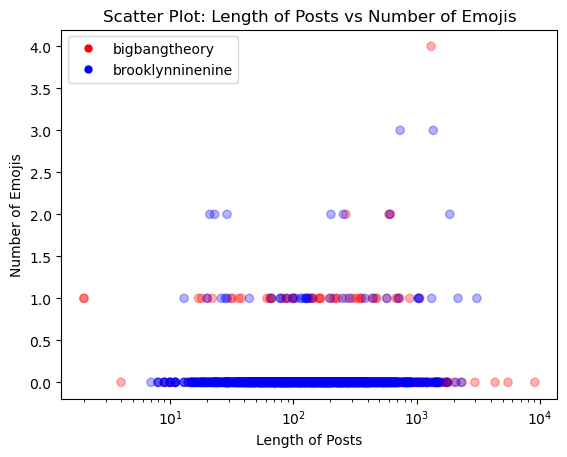

In [37]:
# Scatter plot with different colors for each 'subreddit_' category
plt.scatter(sitcom_df['len_posts'], sitcom_df['num_emojis'],
            c=sitcom_df['subreddit_'].map({0: 'red', 1: 'blue'}),
            alpha=0.3)

# Log scale the x-axis
plt.xscale('log')

plt.xlabel('Length of Posts')
plt.ylabel('Number of Emojis')
plt.title('Scatter Plot: Length of Posts vs Number of Emojis')

legend_labels = ['bigbangtheory', 'brooklynninenine']
legend_colors = ['red', 'blue']

# Create custom legend handles
handles = [plt.Line2D([], [], marker='o', markersize=5, color=color, linestyle='') for color in legend_colors]

plt.legend(handles, legend_labels)

plt.show()

**Key Findings:**
- This scatter plot captures the number of emojis vs the length of posts for each subreddit. Brooklynninenine Redditors seem to be more expressive (More number of emojis) but bigbangtheory Reddits seem to have more to say (Longer length of post)! 

In [38]:
sitcom_df.groupby('subreddit_')[['num_emojis','len_posts']].mean()

,num_emojis,len_posts
subreddit_,,
0,0.061810,288.428256
1,0.052899,228.972533


## EDA 4 - Sentiment Analysis

In [39]:
display(sitcom_df)

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
0,Official Discord Server for r/bigbangtheory! H...,0,385,55,[],0,0.127,0.690,0.183,0.5526
1,New 'Big Bang Theory' Spinoff in Development a...,0,73,13,[],0,0.000,1.000,0.000,0.0000
2,Why did Jim Parsons want to move on from the s...,0,113,20,[],0,0.000,0.943,0.057,0.0387
3,Sing Soft Wookie To Me,0,23,5,[],0,0.000,1.000,0.000,0.0000
4,Anyone here relate to a certain character and ...,0,138,22,[],0,0.070,0.837,0.093,0.1280
...,...,...,...,...,...,...,...,...,...,...
1884,cheat day diet options,1,23,4,[],0,0.500,0.500,0.000,-0.4588
1885,"Wife got me this shirt out of the blue, though...",1,72,15,[],0,0.000,0.848,0.152,0.3612
1886,Some say that makes Zeus my Dad...,1,35,7,[],0,0.000,1.000,0.000,0.0000
1887,"If you had to guess, which lines would you say...",1,119,21,[],0,0.000,1.000,0.000,0.0000


In [40]:
sent_summary = sitcom_df.groupby('subreddit_')['neg', 'neu', 'pos', 'compound'].mean()
display(sent_summary)

sent_summary = sent_summary.T.reset_index()
sent_summary = sent_summary.rename(columns={'index': 'sentiment', 0:'bigbangtheory',1:'brooklynninenine'})
display(sent_summary)

,neg,neu,pos,compound
subreddit_,,,,
0,0.058385,0.817001,0.122415,0.239074
1,0.058438,0.805357,0.136215,0.207088


subreddit_,sentiment,bigbangtheory,brooklynninenine
0,neg,0.058385,0.058438
1,neu,0.817001,0.805357
2,pos,0.122415,0.136215
3,compound,0.239074,0.207088


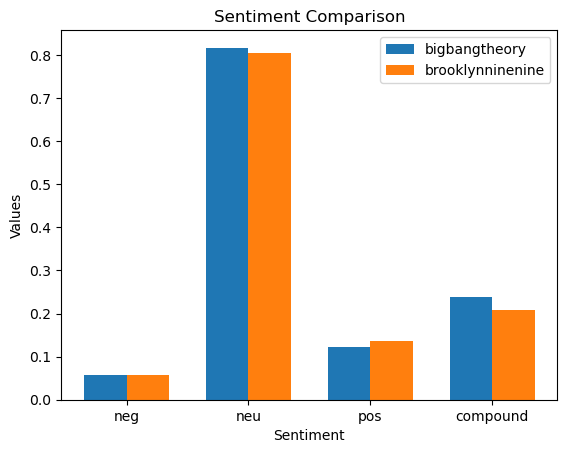

In [41]:
# Set the x-axis values
x = np.arange(4)

# Set the width of each bar
width = 0.35

# Plot the bars
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, sent_summary['bigbangtheory'], width, label='bigbangtheory')
bar2 = ax.bar(x + width/2, sent_summary['brooklynninenine'], width, label='brooklynninenine')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Values')
ax.set_title('Sentiment Comparison')
ax.set_xticks(x)
ax.set_xticklabels(sent_summary['sentiment'])
ax.legend()

# Show the plot
plt.show()

**Key Findings:**
- Majority of the posts in both subreddits were neutral.
- Brooklynninenine posts have greater positive sentiments as compared to bigbangtheory. However, bigbangtheory posts have greater overall sentiment intensity (compound value).

# Modeling

**18 models were ran for preliminary modelling, hyperparameters were then tuned via 9760 fits for the top 4 best performing models by using GridSearchCV. Finally, the top 3 best performing models are selected as the final models, with further tuning done to the best model using extra numerical features.**

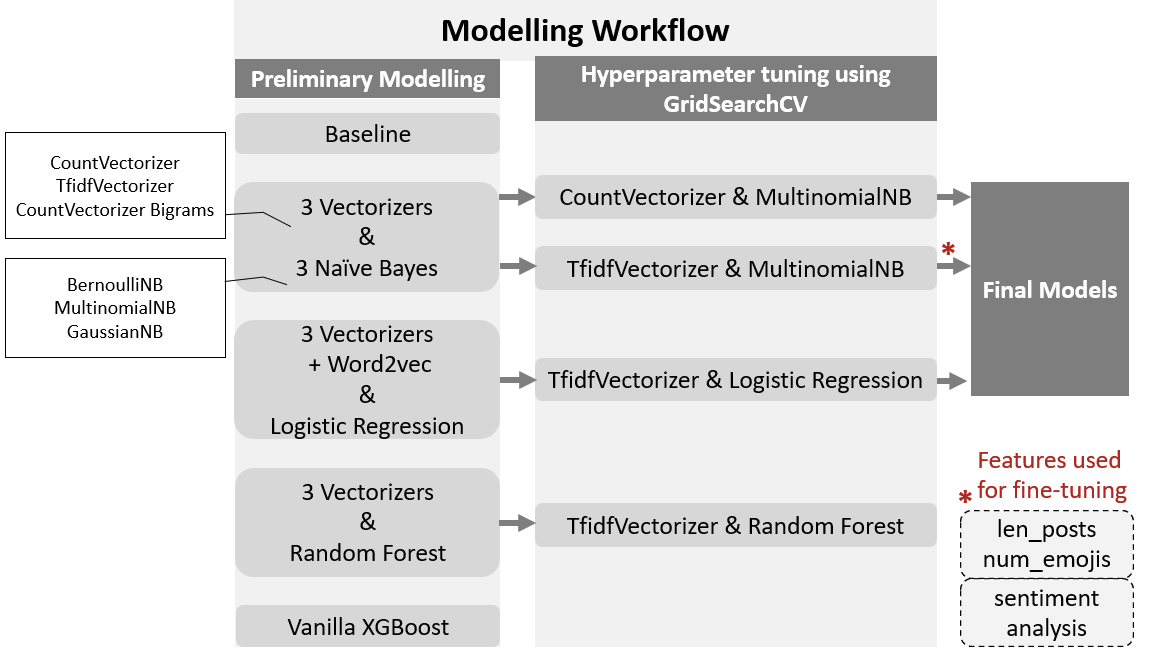

The following are a few functions created to perform train & test data splitting, models fitting & evaluation via confusion matrix & GridSearchCV Hyperparameters tuning.

In [42]:
# Define a function that returns the model scores
# Set view_cm to True to get confusion matrix visualisation
def get_model_score (X, y, pipe, view_cm = False):
    
    # Split the data into train & test by 70 / 30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit the data
    pipe.fit(X_train, y_train)
    display(pipe) # Remove is there is an error
    
    # Make prediction with the model 
    y_pred = pipe.predict(X_test)
    
    # Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp)

    print(classification_report(y_test, y_pred))
    print(f'Accuracy (train): {pipe.score(X_train, y_train)}')
    print(f'Accuracy (test): {pipe.score(X_test, y_test)}')
    print(f'Cross-val-score(cv=5): {cross_val_score(pipe, X_train, y_train, cv=5).mean()}')
    print(f'Sensitivity(TPR): {recall_score(y_test, y_pred)}')
    print(f'Specificity(TNR): {spec}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print('-------------------------------------------------------\n')
    
    if view_cm: 
        
        cm = confusion_matrix(y_test, y_pred)

        ax = sns.heatmap(data=cm, cmap=sns.color_palette(['tomato', 'lightgreen'], as_cmap=True), annot=[[f"TN={cm[0][0]:.0f}", f"FN={cm[0][1]:.0f}"], [f"FP={cm[1][0]:.0f}", f"TP={cm[1][1]:.0f}"]],
                         fmt='', annot_kws={'fontsize': 24}, cbar=False, square=True)

        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.tick_params(length=0, labeltop=True, labelbottom=False)
        ax.xaxis.set_label_position('top')
        ax.set_xticklabels(['Negative (0)', 'Positive (1)'])
        ax.set_yticklabels(['Negative (0)', 'Positive (1)'], rotation=90, va='center')
        ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='ivory', clip_on=False, zorder=0, transform=ax.transAxes))
        ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='ivory', clip_on=False, zorder=0, transform=ax.transAxes))
        plt.tight_layout()
        plt.show()
    
    return pipe

In [43]:
# Define a function that runs GridSearchCV with the Parameters given & return the scores
def get_gridsearch_params(X, y, model, params, folds):
    # Split the data into train & test by 70 / 30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Instantiate the GridSearchCV model
    gs_model = GridSearchCV(estimator=model,
                            param_grid=params,
                            scoring='accuracy',
                            cv=folds,
                            verbose=2
    )
    
    # Fit the model
    gs_model.fit(X_train, y_train)
    y_pred = gs_model.predict(X_test)
    
    # Save confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    spec = tn / (tn + fp)
    
    print(f'Best Hyperparameters: {gs_model.best_params_}') # Display the best hyperparameters for the selected model
    print(f'Best training accuracy: {gs_model.best_score_}')
    print(f'Test set accuracy score for best params: {accuracy_score(y_test, y_pred)}')
    # Display the scores for the GridSearched Best Model
    print('-------------------------------------------------------\n')
    print(classification_report(y_test, y_pred))
    print(f'Sensitivity(TPR): {recall_score(y_test, y_pred)}')
    print(f'Specificity(TNR): {spec}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print('-------------------------------------------------------\n')
    return gs_model

## Baseline accuracy

Setting a benchmark on the model performance to tell if our model is better than null model (predicting the plurality class)

In [44]:
# Define the X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)
y_test.value_counts(normalize=True)

1    0.520833
0    0.479167
Name: subreddit_, dtype: float64

## Model Combination 1: Vectorizers with Naive Bayes

**There are 3 types of Vecorization techniques and 3 Naive Bayes models to test on. So lets run these through pipelines and fit our posts data in.**


- **Vectorizers**: `CountVectorizer`, `TfidfVectorizer`, `CountVectorizer Bigrams`
- **Naive Bayes Estimators:**: `BernoulliNB`, `MultinomialNB`, `GaussianNB`

Running CountVectorizer with all 3 Naive Bayes Model:

BernoulliNB with CountVectorizer


Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('nb', BernoulliNB())])

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       265
           1       0.83      0.97      0.90       302

    accuracy                           0.88       567
   macro avg       0.90      0.88      0.88       567
weighted avg       0.89      0.88      0.88       567

Accuracy (train): 0.9039334341906202
Accuracy (test): 0.8818342151675485
Cross-val-score(cv=5): 0.8373842195540309
Sensitivity(TPR): 0.9735099337748344
Specificity(TNR): 0.7773584905660378
Precision: 0.8328611898016998
-------------------------------------------------------



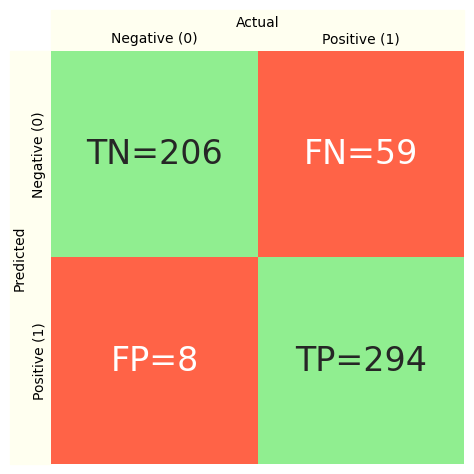

MultinomialNB with CountVectorizer


Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('nb', MultinomialNB())])

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       265
           1       0.91      0.91      0.91       302

    accuracy                           0.91       567
   macro avg       0.91      0.91      0.91       567
weighted avg       0.91      0.91      0.91       567

Accuracy (train): 0.9644478063540091
Accuracy (test): 0.9065255731922398
Cross-val-score(cv=5): 0.8774499714122357
Sensitivity(TPR): 0.9105960264900662
Specificity(TNR): 0.9018867924528302
Precision: 0.9136212624584718
-------------------------------------------------------

GaussianNB with CountVectorizer


Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('sparse_to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x000001F524D29870>)),
                ('gnb', GaussianNB())])

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       265
           1       0.83      0.93      0.88       302

    accuracy                           0.86       567
   macro avg       0.87      0.86      0.86       567
weighted avg       0.87      0.86      0.86       567

Accuracy (train): 0.9636913767019667
Accuracy (test): 0.8624338624338624
Cross-val-score(cv=5): 0.8244797026872499
Sensitivity(TPR): 0.9271523178807947
Specificity(TNR): 0.7886792452830189
Precision: 0.8333333333333334
-------------------------------------------------------



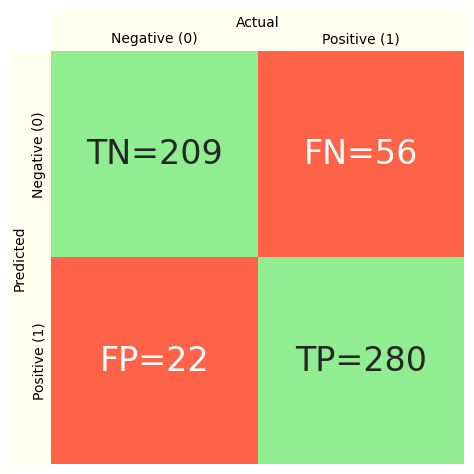

In [45]:
# Define the X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

#BernoulliNB
bnm_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('nb', BernoulliNB())
])

# Running the model & returning the trained model & scores
print('BernoulliNB with CountVectorizer')
bnm_cv_model = get_model_score(X, y, bnm_cv, True)

# MultinomialNB
mnm_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('nb', MultinomialNB())
])

# Running the model & returning the trained model & scores
print('MultinomialNB with CountVectorizer')
mnm_cv_model = get_model_score(X, y, mnm_cv)

# GaussianNB
sparse_to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)
gnm_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('sparse_to_dense', sparse_to_dense),
    ('gnb', GaussianNB())
])

# Running the model & returning the trained model & scores
print('GaussianNB with CountVectorizer')
gnm_cv_model = get_model_score(X, y, gnm_cv, True)

In [46]:
mnm_cv_model.classes_

array([0, 1], dtype=int64)

Running TfidfVectorizer with all 3 Naive Bayes Model:

In [47]:
#BernoulliNB
bnm_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('nb', BernoulliNB())
])

# Running the model & returning the trained model & scores
print('BernoulliNB with TfidfVectorizer')
bnm_tf_model = get_model_score(X, y, bnm_tf)

# MultinomialNB
mnm_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('nb', MultinomialNB())
])

# Running the model & returning the trained model & scores
print('MultinomialNB with TfidfVectorizer')
mnm_tf_model = get_model_score(X, y, mnm_tf)

# GaussianNB
gnm_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('sparse_to_dense', sparse_to_dense),
    ('gnb', GaussianNB())
])

# Running the model & returning the trained model & scores
print('GaussianNB with TfidfVectorizer')
gnm_tf_model = get_model_score(X, y, gnm_tf)

BernoulliNB with TfidfVectorizer


Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('nb', BernoulliNB())])

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       265
           1       0.83      0.97      0.90       302

    accuracy                           0.88       567
   macro avg       0.90      0.88      0.88       567
weighted avg       0.89      0.88      0.88       567

Accuracy (train): 0.9039334341906202
Accuracy (test): 0.8818342151675485
Cross-val-score(cv=5): 0.8373842195540309
Sensitivity(TPR): 0.9735099337748344
Specificity(TNR): 0.7773584905660378
Precision: 0.8328611898016998
-------------------------------------------------------

MultinomialNB with TfidfVectorizer


Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('nb', MultinomialNB())])

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       265
           1       0.93      0.91      0.92       302

    accuracy                           0.92       567
   macro avg       0.92      0.92      0.92       567
weighted avg       0.92      0.92      0.92       567

Accuracy (train): 0.9863842662632375
Accuracy (test): 0.9171075837742504
Cross-val-score(cv=5): 0.8729216695254431
Sensitivity(TPR): 0.9105960264900662
Specificity(TNR): 0.9245283018867925
Precision: 0.9322033898305084
-------------------------------------------------------

GaussianNB with TfidfVectorizer


Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('sparse_to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x000001F524D29870>)),
                ('gnb', GaussianNB())])

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       265
           1       0.83      0.83      0.83       302

    accuracy                           0.82       567
   macro avg       0.82      0.82      0.82       567
weighted avg       0.82      0.82      0.82       567

Accuracy (train): 0.9826021180030258
Accuracy (test): 0.818342151675485
Cross-val-score(cv=5): 0.7866495140080045
Sensitivity(TPR): 0.8278145695364238
Specificity(TNR): 0.8075471698113208
Precision: 0.8305647840531561
-------------------------------------------------------



Running CountVectorizer Bigrams with all 3 Naive Bayes Model:

In [48]:
# Define the X & y
X_bi = sitcom_df_bi['posts']
y = sitcom_df_bi['subreddit_']

#BernoulliNB
bnm_bi = Pipeline([
    ('bi', CountVectorizer(ngram_range=(2,2))),
    ('nb', BernoulliNB())
])

# Running the model & returning the trained model & scores
print('BernoulliNB with Bigrams')
bnm_bi_model = get_model_score(X_bi, y, bnm_bi)

# MultinomialNB
mnm_bi = Pipeline([
    ('bi', CountVectorizer(ngram_range=(2,2))),
    ('nb', MultinomialNB())
])

# Running the model & returning the trained model & scores
print('MultinomialNB with Bigrams')
mnm_bi_model = get_model_score(X_bi, y, mnm_bi)

# GaussianNB
gnm_bi = Pipeline([
    ('bi', CountVectorizer(ngram_range=(2,2))),
    ('sparse_to_dense', sparse_to_dense),
    ('gnb', GaussianNB())
])
# Running the model & returning the trained model & scores
print('GaussianNB with Bigrams')
gnm_bi_model = get_model_score(X_bi, y, gnm_bi)

BernoulliNB with Bigrams


Pipeline(steps=[('bi', CountVectorizer(ngram_range=(2, 2))),
                ('nb', BernoulliNB())])

              precision    recall  f1-score   support

           0       1.00      0.10      0.18       265
           1       0.56      1.00      0.72       302

    accuracy                           0.58       567
   macro avg       0.78      0.55      0.45       567
weighted avg       0.77      0.58      0.47       567

Accuracy (train): 0.8229954614220878
Accuracy (test): 0.5802469135802469
Cross-val-score(cv=5): 0.5522126929674099
Sensitivity(TPR): 1.0
Specificity(TNR): 0.1018867924528302
Precision: 0.5592592592592592
-------------------------------------------------------

MultinomialNB with Bigrams


Pipeline(steps=[('bi', CountVectorizer(ngram_range=(2, 2))),
                ('nb', MultinomialNB())])

              precision    recall  f1-score   support

           0       0.83      0.69      0.76       265
           1       0.77      0.87      0.82       302

    accuracy                           0.79       567
   macro avg       0.80      0.78      0.79       567
weighted avg       0.79      0.79      0.79       567

Accuracy (train): 0.9886535552193646
Accuracy (test): 0.7901234567901234
Cross-val-score(cv=5): 0.7466037735849056
Sensitivity(TPR): 0.8741721854304636
Specificity(TNR): 0.6943396226415094
Precision: 0.7652173913043478
-------------------------------------------------------

GaussianNB with Bigrams


Pipeline(steps=[('bi', CountVectorizer(ngram_range=(2, 2))),
                ('sparse_to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x000001F524D29870>)),
                ('gnb', GaussianNB())])

              precision    recall  f1-score   support

           0       0.83      0.62      0.71       265
           1       0.73      0.89      0.80       302

    accuracy                           0.77       567
   macro avg       0.78      0.76      0.76       567
weighted avg       0.78      0.77      0.76       567

Accuracy (train): 0.9878971255673222
Accuracy (test): 0.7654320987654321
Cross-val-score(cv=5): 0.7367581475128644
Sensitivity(TPR): 0.890728476821192
Specificity(TNR): 0.6226415094339622
Precision: 0.7289972899728997
-------------------------------------------------------



### Hyperparameters Tuning for Best Models `CountVectorizer with MultinomialNB` and `TfidfVectorizer with MultinomialNB` :

To maximise the range of `max_features` (ie. the maxinum number of features that can be used to tune the parameter of the pipeline), the parameter is estimated by taking a small sample, and stored in the `max_features` variable.

In [49]:
# Sample a subset of your data
sample_size = 1000
random_indices = random.sample(range(len(sitcom_df['posts'])), sample_size)
sampled_X = X.iloc[random_indices]

# Calculate the maximum number of unique features from the sampled data
max_features = sampled_X.str.split().explode().nunique()
max_features
# # Add the max_features value to the pipe_params dictionary
# pipe_params['cv__max_features'] = [max_features]

9365

Lets tune the hyperparameters for `CountVectorizer with MultinomialNB` model pipeline.

In [50]:
# Define the pipe parameters
pipe_params = {
    'cv__max_features': [ max_features], # 2_000, 3_000, 4_000, 5_000,
    'cv__min_df': [1], # , 2, 3
    'cv__max_df': [.9], #, .95, 1
    'nb__alpha': [0.5], # 0.01, 0.1, 1.0, 10.0
    'nb__fit_prior': [False] # True, 
}

# Define the X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

# MultinomialNB
mnm_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('nb', MultinomialNB())
])

# Run run GridSearchCV with the piped model & returning the trained model & scores
mnm_cv_grid_model = get_gridsearch_params(X, y, mnm_cv, pipe_params, 5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END cv__max_df=0.9, cv__max_features=9365, cv__min_df=1, nb__alpha=0.5, nb__fit_prior=False; total time=   0.2s
[CV] END cv__max_df=0.9, cv__max_features=9365, cv__min_df=1, nb__alpha=0.5, nb__fit_prior=False; total time=   0.2s
[CV] END cv__max_df=0.9, cv__max_features=9365, cv__min_df=1, nb__alpha=0.5, nb__fit_prior=False; total time=   0.2s
[CV] END cv__max_df=0.9, cv__max_features=9365, cv__min_df=1, nb__alpha=0.5, nb__fit_prior=False; total time=   0.2s
[CV] END cv__max_df=0.9, cv__max_features=9365, cv__min_df=1, nb__alpha=0.5, nb__fit_prior=False; total time=   0.2s
Best Hyperparameters: {'cv__max_df': 0.9, 'cv__max_features': 9365, 'cv__min_df': 1, 'nb__alpha': 0.5, 'nb__fit_prior': False}
Best training accuracy: 0.881232132647227
Test set accuracy score for best params: 0.9065255731922398
-------------------------------------------------------

              precision    recall  f1-score   support

           0   

Next, we tune the hyperparameters for `TfidfVectorizer with MultinomialNB` model pipe.

In [51]:
# Define the pipe parameters
pipe_params = {
    'tf__max_features': [max_features], # 2_000, 3_000, 4_000, 5_000
    'tf__min_df': [1], # , 2, 3
    'tf__max_df': [.9], # , .95, 1
    'nb__alpha': [0.5], #0.01, 0.1, , 1.0, 10.0
    'nb__fit_prior': [True] #, False
}

# Define X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

# MultinomialNB
mnm_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('nb', MultinomialNB())
])

# Run run GridSearchCV with the piped model & returning the trained model & scores
mnm_tf_grid_model = get_gridsearch_params(X, y, mnm_tf, pipe_params, 5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END nb__alpha=0.5, nb__fit_prior=True, tf__max_df=0.9, tf__max_features=9365, tf__min_df=1; total time=   0.2s
[CV] END nb__alpha=0.5, nb__fit_prior=True, tf__max_df=0.9, tf__max_features=9365, tf__min_df=1; total time=   0.2s
[CV] END nb__alpha=0.5, nb__fit_prior=True, tf__max_df=0.9, tf__max_features=9365, tf__min_df=1; total time=   0.2s
[CV] END nb__alpha=0.5, nb__fit_prior=True, tf__max_df=0.9, tf__max_features=9365, tf__min_df=1; total time=   0.3s
[CV] END nb__alpha=0.5, nb__fit_prior=True, tf__max_df=0.9, tf__max_features=9365, tf__min_df=1; total time=   0.3s
Best Hyperparameters: {'nb__alpha': 0.5, 'nb__fit_prior': True, 'tf__max_df': 0.9, 'tf__max_features': 9365, 'tf__min_df': 1}
Best training accuracy: 0.8797284162378503
Test set accuracy score for best params: 0.9206349206349206
-------------------------------------------------------

              precision    recall  f1-score   support

           0       0

## Model Combination 2: Vectorizers with Logistics Regression

Lets try the Logistic Regression model on all **3 Vectorizing Technique** and **Word2vec word embedding technique**

- **Vectorizers**: `CountVectorizer`, `TfidfVectorizer`, `CountVectorizer Bigrams`, `Word2vec word embedding`
- **Estimator**: `Logistic Regression`

Running `CountVectorizer`, `TfidfVectorizer`, `CountVectorizer Bigrams` with `Logistic Regression`:

In [52]:
X = sitcom_df['posts']
# X for Bigrams
X_bi = sitcom_df_bi['posts']
y = sitcom_df['subreddit_']

# logistic Regression with CountVectorizer
lr_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('lr', LogisticRegression())
])

print('Logistic Regression with CountVectorizer')
get_model_score(X, y, lr_cv)

# logistic Regression with TfidfVectorizer
lr_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('lr', LogisticRegression())
])

print('Logistic Regression with TfidfVectorizer')
get_model_score(X, y, lr_tf)

# logistic Regression with Bigrams CountVectorizer
lr_bi = Pipeline([
    ('bi', CountVectorizer(ngram_range=(2,2))),
    ('lr', LogisticRegression())
])

print('Logistic Regression with Bigrams')
get_model_score(X_bi, y, lr_bi)

Logistic Regression with CountVectorizer


Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('lr', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       265
           1       0.88      0.95      0.91       302

    accuracy                           0.90       567
   macro avg       0.91      0.90      0.90       567
weighted avg       0.90      0.90      0.90       567

Accuracy (train): 0.9909228441754917
Accuracy (test): 0.9012345679012346
Cross-val-score(cv=5): 0.8638421955403087
Sensitivity(TPR): 0.9503311258278145
Specificity(TNR): 0.8452830188679246
Precision: 0.875
-------------------------------------------------------

Logistic Regression with TfidfVectorizer


Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('lr', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       265
           1       0.87      0.95      0.91       302

    accuracy                           0.90       567
   macro avg       0.91      0.90      0.90       567
weighted avg       0.90      0.90      0.90       567

Accuracy (train): 0.9818456883509834
Accuracy (test): 0.9012345679012346
Cross-val-score(cv=5): 0.872166952544311
Sensitivity(TPR): 0.9536423841059603
Specificity(TNR): 0.8415094339622642
Precision: 0.8727272727272727
-------------------------------------------------------

Logistic Regression with Bigrams


Pipeline(steps=[('bi', CountVectorizer(ngram_range=(2, 2))),
                ('lr', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.87      0.46      0.60       265
           1       0.67      0.94      0.78       302

    accuracy                           0.72       567
   macro avg       0.77      0.70      0.69       567
weighted avg       0.76      0.72      0.70       567

Accuracy (train): 0.989409984871407
Accuracy (test): 0.7160493827160493
Cross-val-score(cv=5): 0.68989136649514
Sensitivity(TPR): 0.9370860927152318
Specificity(TNR): 0.4641509433962264
Precision: 0.6658823529411765
-------------------------------------------------------



Pipeline(steps=[('bi', CountVectorizer(ngram_range=(2, 2))),
                ('lr', LogisticRegression())])

Running `Word2vec` with `Logistic Regression`:

In [53]:
sitcom_df_w2v = sitcom_df.copy() 
sitcom_df_w2v['posts'] = sitcom_df_w2v['posts'].apply(lambda x: gensim.utils.simple_preprocess(x))

X_train, X_test, y_train, y_test = train_test_split(sitcom_df_w2v['posts'], 
                                                    sitcom_df_w2v['subreddit_'],
                                                    test_size=0.3, 
                                                    random_state=99)

In [54]:
# Train the word2vec model
# vector_size = size of word vector. size input all dimensions that meet window param value
# window = number of words before and after the focus word that will be considered as context
# min_count = number of times word must appear in corpus in order to create a word vector
### Important - Model will only be trained on words that meet min_count so it may not learn all words as a result
w2v_model = Word2Vec(X_train, vector_size=10, window=5, min_count=2)

In [55]:
# create a list to store the average of all word vectors for each row of data
review_vect_list = []

# Iterate through each row in X train data
for index, row in X_train.iteritems():

    # Create a Word2Vec vector for each row (review) in train data 
    # By applying the W2V model on each word of each review, we get the word vector (embedding) for each word
    # Each row (review) will be represented by average of all vectors of all words in each row that model has trained on
    model_vector = (np.mean([w2v_model.wv.get_vector(token) for token in row if token in w2v_model.wv], axis=0)).tolist()

    # Check if the line exists else it is vector of zeros
    if type(model_vector) is list:  
        review_vect_list.append(model_vector)
    else:
        review_vect_list.append([str(0) for i in range(10)])
        
word2vec_df = pd.DataFrame(review_vect_list)
word2vec_df


,0,1,2,3,4,5,6,7,8,9
0,0.955714,-0.507799,1.546199,0.555788,-0.043683,0.061203,1.987302,0.944831,-1.936996,-0.812518
1,0.891464,-0.488315,1.557209,0.56499,0.017538,0.070759,2.018735,0.93011,-1.93452,-0.85063
2,0.839594,-0.448134,1.341388,0.480873,-0.026757,0.037483,1.751312,0.825777,-1.684492,-0.725998
3,0.586384,-0.312287,0.991852,0.347431,-0.006557,0.060159,1.3431,0.572939,-1.23417,-0.488671
4,0.929813,-0.51244,1.5506,0.609045,-0.025349,0.048938,2.057842,0.934348,-1.973271,-0.85477
...,...,...,...,...,...,...,...,...,...,...
1317,0.894824,-0.469517,1.471411,0.542199,-0.021737,0.072343,1.890154,0.881426,-1.834584,-0.773352
1318,0.663343,-0.338174,1.0569,0.374917,-0.048013,0.061667,1.261901,0.595783,-1.26307,-0.535105
1319,0.991745,-0.5248,1.527513,0.506918,-0.04231,0.058168,1.946438,0.921034,-1.862097,-0.755477
1320,0.79919,-0.457484,1.385564,0.532628,-0.045896,0.029704,1.797749,0.877673,-1.771564,-0.770054


In [56]:
# Instantiate the model
clf_model_word2vec = LogisticRegression(max_iter=200)

# Fit model
clf_model_word2vec.fit(word2vec_df, y_train)

LogisticRegression(max_iter=200)

In [57]:
test_features_word2vec = []

for index, row in X_test.items():
    model_vector = (np.mean([w2v_model.wv.get_vector(token) for token in row if token in w2v_model.wv], axis=0)).tolist()

    if type(model_vector) is list:
        test_features_word2vec.append(model_vector)
    else:
        test_features_word2vec.append(np.array([0 for i in range(10)]))
        
        
test_predictions_word2vec = clf_model_word2vec.predict(test_features_word2vec)

print(classification_report(y_test, test_predictions_word2vec))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       287
           1       0.60      0.60      0.60       280

    accuracy                           0.60       567
   macro avg       0.60      0.60      0.60       567
weighted avg       0.60      0.60      0.60       567



### Hyperparameters Tuning for Best Model `TfidfVectorizer with Logistic Regression`:

Given the previous score, lets tune the hyperparameters for TfidfVectorizer with LogisticRegression model pipe.

In [58]:
# Define the pipe parameters
pipe_params = {
    'tf__max_features': [ 5_000], # 2_000, 3_000, 4_000,
    'tf__min_df': [1], # , 2, 3
    'tf__max_df': [.9], # , .95, 1
    'lr__penalty': ['l2'], # 'l1',
    'lr__C': [1.0], # np.insert(np.logspace(-3,3,7), -1, 1), # Including the default value of 1 into the array
    'lr__solver'  : [ 'liblinear'] # 'newton-cg', 'lbfgs',
}

# Define X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

# logistic Regression with TfidfVectorizer
lr_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('lr', LogisticRegression())
])

# Run run GridSearchCV with the piped model & returning the trained model & scores
lr_tf_model = get_gridsearch_params(X, y, lr_tf, pipe_params, 5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END lr__C=1.0, lr__penalty=l2, lr__solver=liblinear, tf__max_df=0.9, tf__max_features=5000, tf__min_df=1; total time=   0.3s
[CV] END lr__C=1.0, lr__penalty=l2, lr__solver=liblinear, tf__max_df=0.9, tf__max_features=5000, tf__min_df=1; total time=   0.3s
[CV] END lr__C=1.0, lr__penalty=l2, lr__solver=liblinear, tf__max_df=0.9, tf__max_features=5000, tf__min_df=1; total time=   0.3s
[CV] END lr__C=1.0, lr__penalty=l2, lr__solver=liblinear, tf__max_df=0.9, tf__max_features=5000, tf__min_df=1; total time=   0.3s
[CV] END lr__C=1.0, lr__penalty=l2, lr__solver=liblinear, tf__max_df=0.9, tf__max_features=5000, tf__min_df=1; total time=   0.3s
Best Hyperparameters: {'lr__C': 1.0, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'tf__max_df': 0.9, 'tf__max_features': 5000, 'tf__min_df': 1}
Best training accuracy: 0.8736821040594627
Test set accuracy score for best params: 0.9065255731922398
-----------------------------------------

## Model Combination 3: Random Forest Classifier

Lets try running Random Forest Classifier!

- **Vectorizers**: `CountVectorizer`, `TfidfVectorizer`, `CountVectorizer Bigrams`
- **Estimator**: `Random Forest Classifier`

In [59]:
# Define X & y
X = sitcom_df['posts']
# X for Bigrams
X_bi = sitcom_df_bi['posts']
y = sitcom_df_bi['subreddit_']

# logistic Regression with CountVectorizer
rfc_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('rfc', RandomForestClassifier(random_state=42))
])

# Running the model & returning the trained model & scores
print('Count Vectorizer with Random Forest Classifier')
get_model_score(X, y, rfc_cv)

# logistic Regression with TfidfVectorizer
rfc_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('rfc', RandomForestClassifier(random_state=42))
])

# Running the model & returning the trained model & scores
print('Tfidf Vectorizer with Random Forest Classifier')
get_model_score(X, y, rfc_tf)

# logistic Regression with Bigrams CountVectorizer
rfc_bi = Pipeline([
    ('bi', CountVectorizer(ngram_range=(2,2))),
    ('rfc', RandomForestClassifier(random_state=42))
])

# Running the model & returning the trained model & scores
print('Count Vectorizer with Random Forest Classifier')
get_model_score(X_bi, y, rfc_bi)

Count Vectorizer with Random Forest Classifier


Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('rfc', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

           0       0.93      0.85      0.88       265
           1       0.87      0.94      0.91       302

    accuracy                           0.90       567
   macro avg       0.90      0.89      0.89       567
weighted avg       0.90      0.90      0.90       567

Accuracy (train): 1.0
Accuracy (test): 0.8959435626102292
Cross-val-score(cv=5): 0.8676100628930818
Sensitivity(TPR): 0.9403973509933775
Specificity(TNR): 0.8452830188679246
Precision: 0.8738461538461538
-------------------------------------------------------

Tfidf Vectorizer with Random Forest Classifier


Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('rfc', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       265
           1       0.86      0.94      0.90       302

    accuracy                           0.89       567
   macro avg       0.89      0.88      0.88       567
weighted avg       0.89      0.89      0.88       567

Accuracy (train): 1.0
Accuracy (test): 0.8853615520282186
Cross-val-score(cv=5): 0.8608147512864495
Sensitivity(TPR): 0.9403973509933775
Specificity(TNR): 0.8226415094339623
Precision: 0.8580060422960725
-------------------------------------------------------

Count Vectorizer with Random Forest Classifier


Pipeline(steps=[('bi', CountVectorizer(ngram_range=(2, 2))),
                ('rfc', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

           0       0.89      0.38      0.54       265
           1       0.64      0.96      0.77       302

    accuracy                           0.69       567
   macro avg       0.76      0.67      0.65       567
weighted avg       0.76      0.69      0.66       567

Accuracy (train): 0.989409984871407
Accuracy (test): 0.689594356261023
Cross-val-score(cv=5): 0.6588879359634076
Sensitivity(TPR): 0.956953642384106
Specificity(TNR): 0.3849056603773585
Precision: 0.6393805309734514
-------------------------------------------------------



Pipeline(steps=[('bi', CountVectorizer(ngram_range=(2, 2))),
                ('rfc', RandomForestClassifier(random_state=42))])

Results were not super! Lets try tuning the hyperparameters for the model.

### Hyperparameters Tuning for Best Model `TfidfVectorizer with Random Forest`:

In [60]:
# Define the pipe parameters
pipe_params = {
    'tf__max_features': [2_000], # 3_000, 4_000, 5_000
    'tf__min_df': [1], # 2, 3
    'tf__max_df': [.9], # .95, 1
    'rfc__n_estimators': [100], # 50 , 150, 200, 300
    'rfc__max_depth': [None], # 4,5,6,7,8
    'rfc__max_features': ['sqrt'] #'log2'
    
}

# Define X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

# logistic Regression with TfidfVectorizer
rfc_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('rfc', RandomForestClassifier(random_state=42))
])

# Running the model & returning the trained model & scores
rfc_tf_model = get_gridsearch_params(X, y, rfc_tf, pipe_params, 5)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=100, tf__max_df=0.9, tf__max_features=2000, tf__min_df=1; total time=   1.0s
[CV] END rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=100, tf__max_df=0.9, tf__max_features=2000, tf__min_df=1; total time=   1.1s
[CV] END rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=100, tf__max_df=0.9, tf__max_features=2000, tf__min_df=1; total time=   1.0s
[CV] END rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=100, tf__max_df=0.9, tf__max_features=2000, tf__min_df=1; total time=   1.0s
[CV] END rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=100, tf__max_df=0.9, tf__max_features=2000, tf__min_df=1; total time=   1.0s
Best Hyperparameters: {'rfc__max_depth': None, 'rfc__max_features': 'sqrt', 'rfc__n_estimators': 100, 'tf__max_df': 0.9, 'tf__max_features': 2000, 'tf__min_df': 1}
Best training accuracy: 0.875200

In [61]:
rfc_tf_model.classes_

array([0, 1], dtype=int64)

## Model 4: Vanilla XGBoost

In [62]:
from xgboost import XGBClassifier

In [63]:
# Define X & y
X = sitcom_df['posts']
# X for Bigrams
X_bi = sitcom_df_bi['posts']
y = sitcom_df_bi['subreddit_']

# XGBoost with CountVectorizer
xgb_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('xgb', XGBClassifier(random_state=42))
])

# Running the model & returning the trained model & scores
print('Count Vectorizer with XGBoost Classifier')
XGB_cv_model = get_model_score(X, y, xgb_cv)

# XGBoost with TfidfVectorizer
xgb_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text)),
    ('xgb', XGBClassifier(random_state=42))
])

# Running the model & returning the trained model & scores
print('Tfidf Vectorizer with XGBoost Classifier')
XGB_tf_model = get_model_score(X, y, xgb_tf)

# XGBoost with Bigrams CountVectorizer
xgb_bi = Pipeline([
    ('bi', CountVectorizer(ngram_range=(2,2))),
    ('xgb', XGBClassifier(random_state=42))
])

# Running the model & returning the trained model & scores
print('Count Vectorizer with XGBoost with Bigrams')
XGB_bi_model = get_model_score(X_bi, y, xgb_bi)

Count Vectorizer with XGBoost Classifier


Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       265
           1       0.86      0.93      0.90       302

    accuracy                           0.89       567
   macro avg       0.89      0.88      0.88       567
weighted avg       0.89      0.89      0.88       567

Accuracy (train): 0.9417549167927383
Accuracy (test): 0.8853615520282186
Cross-val-score(cv=5): 0.8524899942824471
Sensitivity(TPR): 0.9337748344370861
Specificity(TNR): 0.8301886792452831
Precision: 0.8623853211009175
-------------------------------------------------------

Tfidf Vectorizer with XGBoost Classifier


Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       265
           1       0.85      0.91      0.88       302

    accuracy                           0.87       567
   macro avg       0.87      0.86      0.86       567
weighted avg       0.87      0.87      0.87       567

Accuracy (train): 0.959909228441755
Accuracy (test): 0.8659611992945326
Cross-val-score(cv=5): 0.8509862778730704
Sensitivity(TPR): 0.9139072847682119
Specificity(TNR): 0.8113207547169812
Precision: 0.8466257668711656
-------------------------------------------------------

Count Vectorizer with XGBoost with Bigrams


Pipeline(steps=[('bi', CountVectorizer(ngram_range=(2, 2))),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

              precision    recall  f1-score   support

           0       0.75      0.37      0.49       265
           1       0.62      0.89      0.73       302

    accuracy                           0.65       567
   macro avg       0.68      0.63      0.61       567
weighted avg       0.68      0.65      0.62       567

Accuracy (train): 0.705748865355522
Accuracy (test): 0.6472663139329806
Cross-val-score(cv=5): 0.615008576329331
Sensitivity(TPR): 0.890728476821192
Specificity(TNR): 0.36981132075471695
Precision: 0.6169724770642202
-------------------------------------------------------



In [64]:
# Define the pipe parameters
pipe_params = {
    'cv__max_features': [2_000], #, 3_000, 4_000, 5_000
    'cv__min_df': [2], #, 3
    'cv__max_df': [.9], #, .95
    'xgb__max_depth': [2], #range (2, 10, 1),
    'xgb__n_estimators': [180], #range(60, 220, 40),
    'xgb__learning_rate': [0.1, 0.01, 0.05]
}

# Define X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

# XGBoost with CountVectorizer
xgb_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text)),
    ('xgb', XGBClassifier(random_state=42))
])

# Run run GridSearchCV with the piped model & returning the trained model & scores
xgb_cv_grid_model = get_gridsearch_params(X, y, xgb_cv, pipe_params, 5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END cv__max_df=0.9, cv__max_features=2000, cv__min_df=2, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=180; total time=   0.4s
[CV] END cv__max_df=0.9, cv__max_features=2000, cv__min_df=2, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=180; total time=   0.4s
[CV] END cv__max_df=0.9, cv__max_features=2000, cv__min_df=2, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=180; total time=   0.4s
[CV] END cv__max_df=0.9, cv__max_features=2000, cv__min_df=2, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=180; total time=   0.4s
[CV] END cv__max_df=0.9, cv__max_features=2000, cv__min_df=2, xgb__learning_rate=0.1, xgb__max_depth=2, xgb__n_estimators=180; total time=   0.4s
[CV] END cv__max_df=0.9, cv__max_features=2000, cv__min_df=2, xgb__learning_rate=0.01, xgb__max_depth=2, xgb__n_estimators=180; total time=   0.4s
[CV] END cv__max_df=0.9, cv__max_features=2000, cv__min_df=2, x

## Fine Tuning of Best Models

The optimised parameters from GridSearchCV are passed into the top 3 best performing models, for fine tuning purpose.

In [65]:
# Define X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

### Model 1. CountVectorizer with MultinomialNB

In [66]:
# CountVectorizer with MultinomialNB
mnm_cv = Pipeline([
    ('cv', CountVectorizer(analyzer=clean_text, max_df=0.9, max_features=9355, min_df=1)),
    ('nb', MultinomialNB(alpha=0.5, fit_prior=False))
])

# Running the model & returning the trained model & scores
print('MultinomialNB with CountVectorizer')
mnm_cv_model = get_model_score(X, y, mnm_cv)

MultinomialNB with CountVectorizer


Pipeline(steps=[('cv',
                 CountVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                 max_df=0.9, max_features=9355)),
                ('nb', MultinomialNB(alpha=0.5, fit_prior=False))])

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       265
           1       0.92      0.90      0.91       302

    accuracy                           0.91       567
   macro avg       0.91      0.91      0.91       567
weighted avg       0.91      0.91      0.91       567

Accuracy (train): 0.970499243570348
Accuracy (test): 0.9065255731922398
Cross-val-score(cv=5): 0.881232132647227
Sensitivity(TPR): 0.9039735099337748
Specificity(TNR): 0.909433962264151
Precision: 0.9191919191919192
-------------------------------------------------------



### Model 2. TfidfVectorizer with MultinomialNB

In [67]:
# TfidfVectorizer with MultinomialNB
mnm_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text, max_df=0.9, max_features=9355, min_df=1)),
    ('nb', MultinomialNB(alpha=0.5, fit_prior=True))
])

print('MultinomialNB with TfidfVectorizer')
mnm_tf_model = get_model_score(X, y, mnm_tf)

MultinomialNB with TfidfVectorizer


Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                 max_df=0.9, max_features=9355)),
                ('nb', MultinomialNB(alpha=0.5))])

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       265
           1       0.94      0.91      0.92       302

    accuracy                           0.92       567
   macro avg       0.92      0.92      0.92       567
weighted avg       0.92      0.92      0.92       567

Accuracy (train): 0.9886535552193646
Accuracy (test): 0.9206349206349206
Cross-val-score(cv=5): 0.8797284162378503
Sensitivity(TPR): 0.9139072847682119
Specificity(TNR): 0.9283018867924528
Precision: 0.9355932203389831
-------------------------------------------------------



### Model 3. TfidfVectorizer with LogisticRegression

In [68]:
# TfidfVectorizer with logistic Regression 
lr_tf = Pipeline([
    ('tf', TfidfVectorizer(analyzer=clean_text, max_df=0.9, max_features=5000, min_df=1)),
    ('lr', LogisticRegression(C= 1.0, penalty='l2', solver='liblinear'))
])

print('Logistic Regression with TfidfVectorizer')
get_model_score(X, y, lr_tf)

Logistic Regression with TfidfVectorizer


Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                 max_df=0.9, max_features=5000)),
                ('lr', LogisticRegression(solver='liblinear'))])

              precision    recall  f1-score   support

           0       0.95      0.85      0.89       265
           1       0.88      0.96      0.92       302

    accuracy                           0.91       567
   macro avg       0.91      0.90      0.91       567
weighted avg       0.91      0.91      0.91       567

Accuracy (train): 0.9795763993948563
Accuracy (test): 0.9065255731922398
Cross-val-score(cv=5): 0.8736821040594627
Sensitivity(TPR): 0.956953642384106
Specificity(TNR): 0.8490566037735849
Precision: 0.878419452887538
-------------------------------------------------------



Pipeline(steps=[('tf',
                 TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                 max_df=0.9, max_features=5000)),
                ('lr', LogisticRegression(solver='liblinear'))])

## Summary of Best Models

|  | Accuracy (Train) | Accuracy (Test) | Cross Validation Score |
|---|---|---|---|
| Baseline Model | 0.520833 | 0.520833 | NA |
| Multinomial(NB) + CountVect + GridSearchCV | 0.97050 | 0.90653 | 0.88123 |  |  |
| Logistic Regression + TF-IDF + GridSearchCV | 0.97957 | 0.90652 | 0.87368 |  |
| **(Best Model)**<br>**Multinomial(NB) + TF-IDF + GridSearchCV** | **0.98865** | **0.92063** | **0.87973** |

### Final tuning using `TfidfVectorizer with MultinomialNB`

**`TfidfVectorizer with MultinomialNB` will be used for used for fine tuning first as it has the best results, to observe the impact of additional features on model accuracy.**

#### 1. Including `len_posts` and `num_emojis` for modelling

In [69]:
sitcom_df

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
0,Official Discord Server for r/bigbangtheory! H...,0,385,55,[],0,0.127,0.690,0.183,0.5526
1,New 'Big Bang Theory' Spinoff in Development a...,0,73,13,[],0,0.000,1.000,0.000,0.0000
2,Why did Jim Parsons want to move on from the s...,0,113,20,[],0,0.000,0.943,0.057,0.0387
3,Sing Soft Wookie To Me,0,23,5,[],0,0.000,1.000,0.000,0.0000
4,Anyone here relate to a certain character and ...,0,138,22,[],0,0.070,0.837,0.093,0.1280
...,...,...,...,...,...,...,...,...,...,...
1884,cheat day diet options,1,23,4,[],0,0.500,0.500,0.000,-0.4588
1885,"Wife got me this shirt out of the blue, though...",1,72,15,[],0,0.000,0.848,0.152,0.3612
1886,Some say that makes Zeus my Dad...,1,35,7,[],0,0.000,1.000,0.000,0.0000
1887,"If you had to guess, which lines would you say...",1,119,21,[],0,0.000,1.000,0.000,0.0000


In [70]:
X = sitcom_df[['posts','len_posts', 'num_emojis']]
y = sitcom_df['subreddit_']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.dtypes

posts         object
len_posts      int64
num_emojis     int64
dtype: object

In [71]:
preprocess = ColumnTransformer(
    [('description_tfidf', TfidfVectorizer(analyzer=clean_text, max_df=0.9, max_features=max_features, min_df=1), 'posts')],
    remainder='passthrough')

pipeline = Pipeline([
    ('preprocessing', preprocess),
    ('nb', MultinomialNB(alpha=0.5, fit_prior=True))
])

# pipeline.fit(X_train, y_train)
# display(pipeline)

# # Calculate the scores
# score = pipeline.score(X_test, y_test)
# score

print('TfidfVectorizer with MultinomialNB')
get_model_score(X, y, pipeline)

TfidfVectorizer with MultinomialNB


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('description_tfidf',
                                                  TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                                                  max_df=0.9,
                                                                  max_features=9365),
                                                  'posts')])),
                ('nb', MultinomialNB(alpha=0.5))])

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       265
           1       0.92      0.74      0.82       302

    accuracy                           0.83       567
   macro avg       0.84      0.83      0.83       567
weighted avg       0.84      0.83      0.82       567

Accuracy (train): 0.9288956127080181
Accuracy (test): 0.8253968253968254
Cross-val-score(cv=5): 0.7957804459691252
Sensitivity(TPR): 0.7350993377483444
Specificity(TNR): 0.9283018867924528
Precision: 0.921161825726141
-------------------------------------------------------



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('description_tfidf',
                                                  TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                                                  max_df=0.9,
                                                                  max_features=9365),
                                                  'posts')])),
                ('nb', MultinomialNB(alpha=0.5))])

Accuracy has reduced. Hence we will not proceed with `len_posts` and `num_emojis`

#### 2. Including sentiment scores for modelling

**Putting 'pos' back into classification model:**

In [72]:
X = sitcom_df[['posts','pos']]
y = sitcom_df['subreddit_']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.dtypes

posts     object
pos      float64
dtype: object

In [73]:
preprocess = ColumnTransformer(
    [('description_tfidf', TfidfVectorizer(analyzer=clean_text, max_df=0.9, max_features=max_features, min_df=1), 'posts')],
    remainder='passthrough')

pipeline = Pipeline([
    ('preprocessing', preprocess),
    ('nb', MultinomialNB(alpha=0.5, fit_prior=True))
])

# pipeline.fit(X_train, y_train)
# display(pipeline)

# # Calculate the scores
# score = pipeline.score(X_test, y_test)
# score

print('TfidfVectorizer with MultinomialNB')
get_model_score(X, y, pipeline)

TfidfVectorizer with MultinomialNB


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('description_tfidf',
                                                  TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                                                  max_df=0.9,
                                                                  max_features=9365),
                                                  'posts')])),
                ('nb', MultinomialNB(alpha=0.5))])

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       265
           1       0.93      0.91      0.92       302

    accuracy                           0.92       567
   macro avg       0.92      0.92      0.92       567
weighted avg       0.92      0.92      0.92       567

Accuracy (train): 0.9878971255673222
Accuracy (test): 0.9188712522045855
Cross-val-score(cv=5): 0.8767038307604345
Sensitivity(TPR): 0.9139072847682119
Specificity(TNR): 0.9245283018867925
Precision: 0.9324324324324325
-------------------------------------------------------



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('description_tfidf',
                                                  TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                                                  max_df=0.9,
                                                                  max_features=9365),
                                                  'posts')])),
                ('nb', MultinomialNB(alpha=0.5))])

**Putting 'compound' back into classification model:**

In [74]:
X = sitcom_df[['posts','compound']]
y = sitcom_df['subreddit_']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.dtypes

posts        object
compound    float64
dtype: object

In [75]:
from sklearn.preprocessing import MinMaxScaler

preprocess = ColumnTransformer(
    [
        ('description_tfidf', TfidfVectorizer(analyzer=clean_text, max_df=0.9, max_features=max_features, min_df=1), 'posts'),
        ('compound_scale', MinMaxScaler(feature_range=(1, 10)), ['compound'])
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessing', preprocess),
    ('nb', MultinomialNB(alpha=0.5, fit_prior=True))
])

# pipeline.fit(X_train, y_train)
# display(pipeline)

# # Calculate the scores
# score = pipeline.score(X_test, y_test)
# score

print('TfidfVectorizer with MultinomialNB')
get_model_score(X, y, pipeline)

TfidfVectorizer with MultinomialNB


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('description_tfidf',
                                                  TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                                                  max_df=0.9,
                                                                  max_features=9365),
                                                  'posts'),
                                                 ('compound_scale',
                                                  MinMaxScaler(feature_range=(1,
                                                                              10)),
                                                  ['compound'])])),
                ('nb', MultinomialNB(alpha=0.5))])

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       265
           1       0.91      0.91      0.91       302

    accuracy                           0.91       567
   macro avg       0.91      0.91      0.91       567
weighted avg       0.91      0.91      0.91       567

Accuracy (train): 0.9848714069591528
Accuracy (test): 0.9065255731922398
Cross-val-score(cv=5): 0.8729159519725558
Sensitivity(TPR): 0.9139072847682119
Specificity(TNR): 0.8981132075471698
Precision: 0.9108910891089109
-------------------------------------------------------



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('description_tfidf',
                                                  TfidfVectorizer(analyzer=<function clean_text at 0x000001F524D29C60>,
                                                                  max_df=0.9,
                                                                  max_features=9365),
                                                  'posts'),
                                                 ('compound_scale',
                                                  MinMaxScaler(feature_range=(1,
                                                                              10)),
                                                  ['compound'])])),
                ('nb', MultinomialNB(alpha=0.5))])

**Key Findings:**
- The results above do not show an increase in accuracy. Hence, we will not be adding this additional features for our final model.

#### Exporting Models

In [76]:
import pickle

# save the models to streamlit folder for deployment
current_directory = os.getcwd()
file_path = os.path.join(current_directory, '../streamlit/mnm_tf_model.pkl')
pickle.dump(mnm_tf_model, open(filepath, 'wb'))

## Best Model Evaluation

### Accuracy

The key metric - accuracy is used for analysis as it is a direct way to compare the different models.

[TfidfVectorizer with MultinomialNB](#Model-2.-TfidfVectorizer-with-MultinomialNB) is the best performing model, with accuracies significantly higher than the baseline model. Though the cross validation accuracy is comparative with the other better performing models, the train and test accuracy scores are leading by a larger margin. 

|  | Accuracy (Train) | Accuracy (Test) | Cross Validation Score |
|---|---|---|---|
| Baseline Model | 0.520833 | 0.520833 | NA |
| **Multinomial(NB) + TF-IDF + GridSearchCV** | **0.98865** | **0.92063** | **0.87973** |

### Feature Importance

In [77]:
best_model_feature_names=mnm_tf_grid_model.best_estimator_[0].get_feature_names_out()

print(best_model_feature_names.shape)

# feature log probabilities for class 1
best_model_class1=mnm_tf_grid_model.best_estimator_.steps[1][1].feature_log_prob_[1]

print(best_model_class1.shape)

best_model_class1_df=pd.DataFrame(data=[best_model_class1], columns=best_model_feature_names)

# feature log probabilities for class 0
best_model_class0=mnm_tf_grid_model.best_estimator_.steps[1][1].feature_log_prob_[0]

best_model_class0_df=pd.DataFrame(data=[best_model_class0], columns=best_model_feature_names)

# calc the difference between class 1 and class 0 coefs
best_model_df = best_model_class1_df - best_model_class0

print("\nTop features for brooklynninenine")
print(best_model_df.max().sort_values(ascending=False).head(20))
# if positive, more liklely to be in be class 1 + the bigger the magnitude the more predictive

print("\nTop features for bigbangtheory (Magnitude)")
print(best_model_df.max().sort_values(ascending=False).tail(20))

(6246,)
(6246,)

Top features for brooklynninenine
jake         3.756526
holt         3.610903
boyle        3.261379
rosa         3.139450
charles      3.058422
b99          3.041289
terry        3.000426
gina         2.965169
nine         2.887422
brooklyn     2.878999
scully       2.668336
hitchcock    2.468088
holts        2.420226
peralta      2.381173
99           2.365311
pimento      2.185694
santiago     2.172680
captain      2.128342
diaz         2.071698
ninenine     2.067835
dtype: float64

Top features for bigbangtheory (Magnitude)
bert         -1.806317
flag         -1.886893
priya        -1.894999
father       -1.924593
gang         -2.031267
wolowitz     -2.085484
vote         -2.097841
bang         -2.134076
stuart       -2.152448
cooper       -2.185171
bbt          -2.308415
view         -2.583689
sheldons     -2.602626
bernadette   -2.826623
tbbt         -2.880121
raj          -3.404071
howard       -3.516162
leonard      -3.661346
penny        -3.875237
sheldon      

Since it is observed that character names often have the higher feature importance and hence extremely characteristic of a specific show, we will be checking the feature importance after removing character names as well.

In [78]:

character_names=['jake', 'holt', 'boyle', 'rosa', 'charles', 'terry', 'gina', 'scully', 'hitchcock', 'holts', 
                 'peralta', 'pimento', 'santiago', 'diaz', 'doug', 'jakes', 'kevin', 'peraltiago', 'judy', 
                 'wunch', 'wuntch', 'nikolaj', 'raymond', 'sheldon','penny', 'howard', 'leonard', 'raj',
                'bernadette', 'sheldons', 'cooper', 'stuart', 'wolowitz', 'priya', 'bert', 'kripke', 'jones',
                'beverly', 'stewart', 'james', 'anu', 'emily', 'mary']

best_model_no_characters_df=best_model_df.drop(character_names, axis=1)

# feature importance for brooklyn nine nine without character names
best_model_no_characters_df.max().sort_values(ascending=False).head(20)

# feature importance for big bang theory without character names
bbt_feat_impt=best_model_no_characters_df.max().sort_values(ascending=False).tail(20)

bbt_feat_impt.sort_values(ascending=True)

tbbt      -2.880121
view      -2.583689
bbt       -2.308415
bang      -2.134076
vote      -2.097841
gang      -2.031267
father    -1.924593
flag      -1.886893
comet     -1.801713
science   -1.709959
knock     -1.708414
young     -1.665038
nobel     -1.623368
hbo       -1.542135
dating    -1.538068
star      -1.521292
max       -1.444057
big       -1.434441
coffee    -1.429333
prize     -1.396606
dtype: float64

#### Shapley values

In [79]:
# Define the X & y
X = sitcom_df['posts']
y = sitcom_df['subreddit_']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)
# Train the TF-IDF transformer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9,
                                   max_features=3000,
                                   min_df=2)
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# Train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test) # Transform test texts using the trained TF-IDF vectorizer

X_train_tfidf_df=pd.DataFrame(X_train_tfidf.toarray())
X_train_tfidf_df.columns=tfidf_vectorizer.get_feature_names_out()

X_test_tfidf_df=pd.DataFrame(X_test_tfidf.toarray())
X_test_tfidf_df.columns=tfidf_vectorizer.get_feature_names_out()

  0%|          | 0/50 [00:00<?, ?it/s]

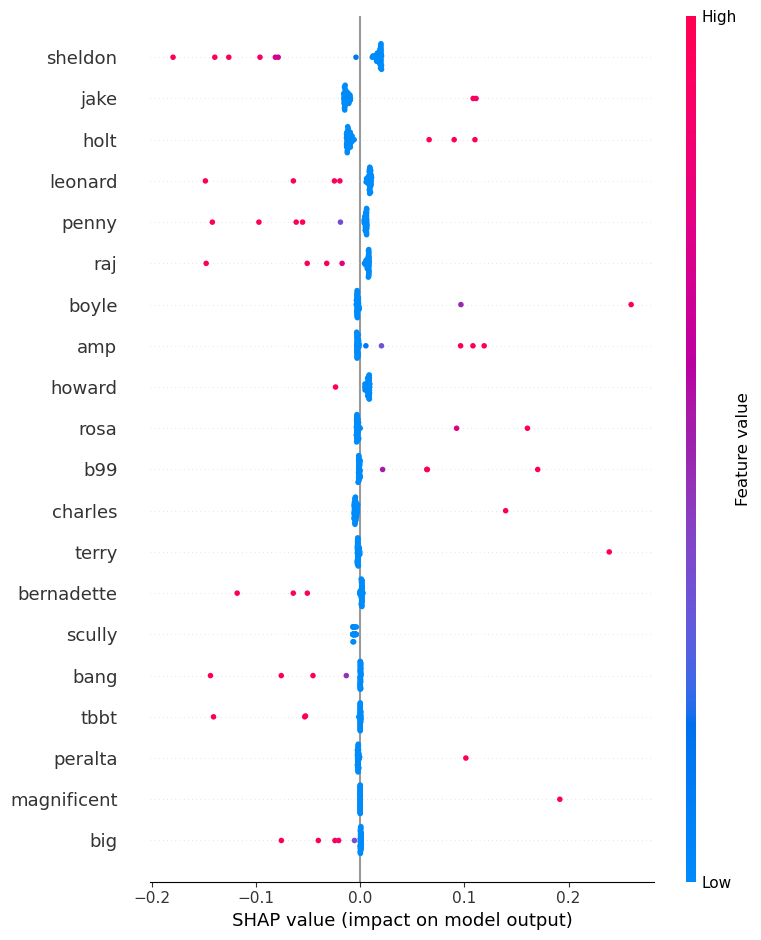

In [136]:
# Compute Shapley values

explainer = shap.KernelExplainer(nb_classifier.predict_proba, X_train_tfidf_df[0:100])
shap_values = explainer.shap_values(X_test_tfidf_df[0:50])

shap.summary_plot(shap_values[1], X_test_tfidf_df[0:50])

**Key Findings:**
<br>We were only able to send first 100 posts from X_train into Shapley to be fitted to the model. Then based on the first 50 posts from X_test, the above figure shows the keywords and their importance in predicting if the post belongs to bigbangtheory (to the right) or brooklynninenine (to the left). Even though it is not the whole database, the results generally affirm the results we got in Feature Importance above, with character names playing a big part in defining which class the posts belong to.


### ROC AUC

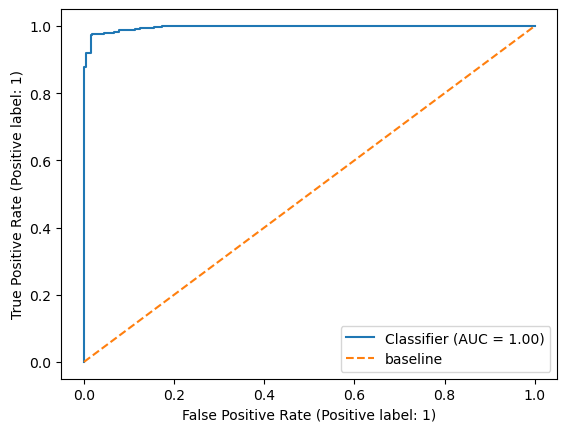

In [81]:
# Retrieving probability of class 1
predicted_probability=[i[1] for i in mnm_tf_model.predict_proba(X_test)]

pred_df=pd.DataFrame({'true_values': y_test,
                      'pred_prob': predicted_probability})

roc_auc_score(pred_df['true_values'], pred_df['pred_prob'])

RocCurveDisplay.from_predictions(pred_df['true_values'], pred_df['pred_prob'])
plt.plot([0, 1], [0, 1],
         label='baseline', linestyle='--')
plt.legend();

**Key Findings:**
<br>Area under the curved achieved is 0.996, which indicates a good model performance at distinguishing between Brooklyn nine nine posts (class I) and big bang theory posts (class II)

### Confusion Matrix

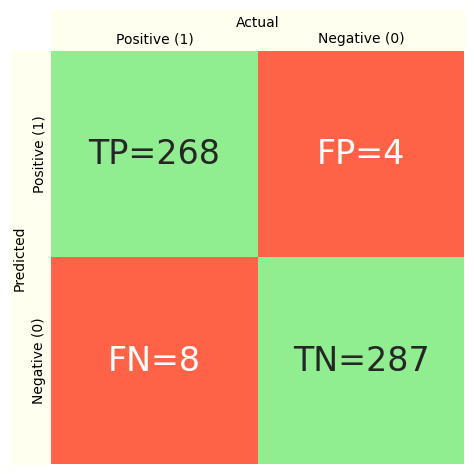

Specificity: 0.9862542955326461
Sensitivity: 0.9710144927536232
Accuracy: 0.9788359788359788
Precision: 0.9852941176470589


In [85]:
# get predictions
y_preds = mnm_tf_model.predict(X_test)

cm = confusion_matrix(y_test, y_preds)

ax = sns.heatmap(data=cm, cmap=sns.color_palette(['tomato', 'lightgreen'], as_cmap=True), annot=[[f"TP={cm[0][0]:.0f}", f"FP={cm[0][1]:.0f}"], [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
                 fmt='', annot_kws={'fontsize': 24}, cbar=False, square=True)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.tick_params(length=0, labeltop=True, labelbottom=False)
ax.xaxis.set_label_position('top')
ax.set_xticklabels(['Positive (1)', 'Negative (0)'])
ax.set_yticklabels(['Positive (1)', 'Negative (0)'], rotation=90, va='center')
ax.add_patch(plt.Rectangle((0, 1), 1, 0.1, color='ivory', clip_on=False, zorder=0, transform=ax.transAxes))
ax.add_patch(plt.Rectangle((0, 0), -0.1, 1, color='ivory', clip_on=False, zorder=0, transform=ax.transAxes))
plt.tight_layout()
plt.show()

# Save confusion matrix values
tp, fp, fn, tn = confusion_matrix(y_test, y_preds).ravel()


# Calculate the specificity
spec = tn / (tn + fp)

# Calculate the sensitivity
sens = tp / (tp + fn)

# Calculate the accuracy
acc = (tp + tn) / (tp + fp + fn + tn)

# Precision
prec = tp / (tp + fp)

print('Specificity:', spec)
print('Sensitivity:', sens)
print('Accuracy:', acc)
print('Precision:', prec)

### Misclassified posts analysis


In [127]:
# FP posts: from big bang theory but predicted to be brooklyn nine nine

sitcom_df_fp_analysis=pd.merge(X_test, sitcom_df, how='inner', on='posts')
display(sitcom_df_fp_analysis)

sitcom_df_fp_analysis['preds_mnmtf_model']=y_preds
display(sitcom_df_fp_analysis)

fp_posts=sitcom_df_fp_analysis[(sitcom_df_fp_analysis['subreddit_']==0) &
                        (sitcom_df_fp_analysis['preds_mnmtf_model']==1)]

print('\nFalse Positive Posts (Falsely categorized as 1 (bigbangtheory)):')
display(fp_posts)

tfidf_vectorizer.fit(fp_posts['posts'])

fp_words=pd.DataFrame(tfidf_vectorizer.transform(fp_posts['posts']).todense(),
                        columns=tfidf_vectorizer.get_feature_names_out())
print('\nFalse Positive Words:')
display(fp_words)

# FN posts: from brooklyn nine nine but predicted to be big bang theory

fn_posts=sitcom_df_fp_analysis[(sitcom_df_fp_analysis['subreddit_']==1) &
                        (sitcom_df_fp_analysis['preds_mnmtf_model']==0)]
print('\nFalse Negative Posts (Falsely categorized as 1 (brooklynninenine):')
display(fn_posts)

fn_words=pd.DataFrame(tfidf_vectorizer.transform(fn_posts['posts']).todense(),
                        columns=tfidf_vectorizer.get_feature_names_out())
print('\nFalse Negative Words:')
display(fn_words)

,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound
0,It’s magnificent,1,17,2,[],0,0.000,0.204,0.796,0.5994
1,I didn’t know Earl of Sandwich was a real plac...,0,147,26,[😁],1,0.000,0.821,0.179,0.6784
2,this scene waa:DD \nsorry for the hungarian so...,0,116,20,[],0,0.057,0.943,0.000,-0.0387
3,Wholesome Terry,1,16,2,[],0,0.000,1.000,0.000,0.0000
4,It’s crossword puzzle typo day ♥️♥️♥️,1,38,6,[],0,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
562,When exactly did Gina sexually harass Terry? C...,1,348,64,[],0,0.080,0.761,0.159,0.8222
563,what are you're favorite moments from the show...,1,263,41,[],0,0.000,0.726,0.274,0.9042
564,What subreddits would Raj be in? &amp;#x200B;\...,0,188,8,[],0,0.000,1.000,0.000,0.0000
565,Do you think season 8 will be something that p...,1,685,134,[],0,0.096,0.784,0.120,0.1655


,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound,preds_mnmtf_model
0,It’s magnificent,1,17,2,[],0,0.000,0.204,0.796,0.5994,1
1,I didn’t know Earl of Sandwich was a real plac...,0,147,26,[😁],1,0.000,0.821,0.179,0.6784,0
2,this scene waa:DD \nsorry for the hungarian so...,0,116,20,[],0,0.057,0.943,0.000,-0.0387,0
3,Wholesome Terry,1,16,2,[],0,0.000,1.000,0.000,0.0000,1
4,It’s crossword puzzle typo day ♥️♥️♥️,1,38,6,[],0,0.000,1.000,0.000,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...
562,When exactly did Gina sexually harass Terry? C...,1,348,64,[],0,0.080,0.761,0.159,0.8222,1
563,what are you're favorite moments from the show...,1,263,41,[],0,0.000,0.726,0.274,0.9042,1
564,What subreddits would Raj be in? &amp;#x200B;\...,0,188,8,[],0,0.000,1.000,0.000,0.0000,0
565,Do you think season 8 will be something that p...,1,685,134,[],0,0.096,0.784,0.120,0.1655,1



False Positive Posts (Falsely categorized as 1 (bigbangtheory)):


,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound,preds_mnmtf_model
256,Worst season? It's very hard for me to pick. T...,0,112,25,[],0,0.239,0.761,0.000,-0.6469,1
269,🥺🥹 I just can’t.,0,17,4,[],0,0.000,1.000,0.000,0.0000,1
538,What season was his best look,0,30,6,[],0,0.000,0.543,0.457,0.6369,1
553,😀,0,2,1,[😀],1,0.000,0.000,0.000,0.0000,1



False Positive Words:


,season
0,1.0
1,0.0
2,1.0
3,0.0



False Negative Posts (Falsely categorized as 1 (brooklynninenine):


,posts,subreddit_,len_posts,post_word_count,emojis,num_emojis,neg,neu,pos,compound,preds_mnmtf_model
152,Awkward dialogue What’s your favourite bit of ...,1,113,19,[],0,0.147,0.737,0.115,0.0772,0
154,Who do you think is the funniest character of ...,1,56,11,[],0,0.000,0.735,0.265,0.5574,0
276,Reminds me someone... Sorry for the poor quality.,1,49,8,[],0,0.423,0.577,0.000,-0.5267,0
330,Who is your favorite one off guest appearance?...,1,122,21,[],0,0.000,0.749,0.251,0.7476,0
394,Ask Reddit about people who banged a celebrity,1,47,8,[],0,0.000,1.000,0.000,0.0000,0
422,cheat day diet options,1,23,4,[],0,0.500,0.500,0.000,-0.4588,0
442,"Good day everyone, hope y'all are having a gre...",1,248,47,[],0,0.038,0.690,0.272,0.9111,0
534,I'm mad that I can't watch the show anymore wi...,1,316,66,[],0,0.213,0.618,0.169,-0.7568,0



False Negative Words:


,season
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0


**Key Findings:**
- For FP and FN posts, after TF-IDF Vectorisation was carried out, only the word ‘season’ was wrongly classified

- Notably, ‘season’ is in top 30 common words for both sitcoms. Hence, for future work, we may attempt to tune this feature to achieve better results.


# Conclusion

### Key Insights
* Viewers frequently engage in discussions about popular show elements such as Cold Open, Halloween Heist, and potential sequels.
* Topics that garner significant attention from viewers include their favorite characters and least favorite scenes.
* Viewers actively discuss sitcom characters in their comments about the shows. 

    **Brooklyn's Nine Nine**
    * 'Scene' is commonly mentioned in Brooklyn's Nine Nine
    * 'Halloween' and 'Heist' is identified as a very popular topic among reddit users
    * 'Cold Open' is identified as a unique X-factor of B99

    **The Big Bang Theory**
    * ‘Sheldon’ has very strong impact on viewers in the show
    * 'Season' is commonly mentioned in Big Bang Theory
    * ‘Young’ is seen on BBT very often due to sequel of Young Sheldon

### Key Recommendations

* Create memorable and likable characters to enhance viewer engagement.
* Utilize the "Cold Open" narrative technique, which is widely discussed by viewers.
* Incorporate periodic special events within the show to generate anticipation and excitement among viewers.

### Future Work
- Model can be expanded to Multi-Class Classification
- Further collect text inputs from other sources periodically
- To analyse further sentiments, we will no longer limit the number of posts to be even